In [93]:
import statistics as stats
from itertools import chain
import string
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline

pd.set_option('mode.chained_assignment', None)

In [94]:
rcParams['figure.figsize'] = 12, 8
rcParams['figure.titlesize'] = 15
rcParams['font.size'] = 15
colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']
#plt.savefig('nome_da_imagem.png'`, transparent = True)

In [95]:
cols =[
    'município', 
    'seção',
    'categoria',
    'graudeinstrução',
    'sexo',
    'tipomovimentação',
    'raçacor',
    'idade',
    'salário'
]
newcols=[
    'municipio',
    'secao',
    'categoria',
    'instrucao',
    'genero',
    'tipo',
    'raca',
    'idade',
    'salario'
]
a = list(string.ascii_uppercase)
del(a[21:25] )
genero = ['M','F','N/I']
secao = [
    'Agricultura/Pecuária',
    'Ind. Extrativas',
    'Ind. Transformação',
    'Eletricidade/Gás',
    'Água/Esgoto',
    'Construção',
    'Comércio',
    'Transporte',
    'Alimentação',
    'Informação',
    'Financeiros',
    'Imobiliárias',
    'Profissionais',
    'Administrativas',
    'Adm Pública',
    'Educação',
    'Saúde',
    'Artes/Cultura',
    'Outros Serviços',
    'Domésticos',
    'Org. Internacionais',
    'Não Identificados',
]
mon = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']

In [96]:
jan = pd.read_csv('datasets/2020/CAGEDMOV202001.txt', sep=';', usecols=cols)
fev = pd.read_csv('datasets/2020/CAGEDMOV202002.txt', sep=';', usecols=cols)
mar = pd.read_csv('datasets/2020/CAGEDMOV202003.txt', sep=';', usecols=cols)
abr = pd.read_csv('datasets/2020/CAGEDMOV202004.txt', sep=';', usecols=cols)
mai = pd.read_csv('datasets/2020/CAGEDMOV202005.txt', sep=';', usecols=cols)
jun = pd.read_csv('datasets/2020/CAGEDMOV202006.txt', sep=';', usecols=cols)
jul = pd.read_csv('datasets/2020/CAGEDMOV202007.txt', sep=';', usecols=cols)
ago = pd.read_csv('datasets/2020/CAGEDMOV202008.txt', sep=';', usecols=cols)
set_ = pd.read_csv('datasets/2020/CAGEDMOV202009.txt', sep=';', usecols=cols)
out = pd.read_csv('datasets/2020/CAGEDMOV202010.txt', sep=';', usecols=cols)
nov = pd.read_csv('datasets/2020/CAGEDMOV202011.txt', sep=';', usecols=cols)
dez = pd.read_csv('datasets/2020/CAGEDMOV202012.txt', sep=';', usecols=cols)

In [97]:
data = [jan, fev, mar, abr, mai, jun, jul, ago, set_, out, nov, dez]
def rename(df):
    for i in range(len(df)):
    
        df[i].rename(columns=dict(zip(cols, newcols)), inplace=True)
        df[i] = df[i].loc[data[i]['municipio']==410690]
        
        df[i].loc[df[i]['genero']==1,'genero'] = 'M'
        df[i].loc[df[i]['genero']==3,'genero'] = 'F'
        df[i].loc[df[i]['genero']==9,'genero'] = 'N/I'
        
        df[i].loc[df[i]['secao']=='A','secao'] = 'Agricultura/Pecuária'
        df[i].loc[df[i]['secao']=='B','secao'] = 'Ind. Extrativas'
        df[i].loc[df[i]['secao']=='C','secao'] = 'Ind. Transformação'
        df[i].loc[df[i]['secao']=='D','secao'] = 'Eletricidade/Gás'
        df[i].loc[df[i]['secao']=='E','secao'] = 'Água/Esgoto'
        df[i].loc[df[i]['secao']=='F','secao'] = 'Construção'
        df[i].loc[df[i]['secao']=='G','secao'] = 'Comércio'
        df[i].loc[df[i]['secao']=='H','secao'] = 'Transporte'
        df[i].loc[df[i]['secao']=='I','secao'] = 'Alimentação'
        df[i].loc[df[i]['secao']=='J','secao'] = 'Informação'
        df[i].loc[df[i]['secao']=='K','secao'] = 'Financeiros'
        df[i].loc[df[i]['secao']=='L','secao'] = 'Imobiliárias'
        df[i].loc[df[i]['secao']=='M','secao'] = 'Profissionais'
        df[i].loc[df[i]['secao']=='N','secao'] = 'Administrativas'
        df[i].loc[df[i]['secao']=='O','secao'] = 'Adm Pública'
        df[i].loc[df[i]['secao']=='P','secao'] = 'Educação'
        df[i].loc[df[i]['secao']=='Q','secao'] = 'Saúde'
        df[i].loc[df[i]['secao']=='R','secao'] = 'Artes/Cultura'
        df[i].loc[df[i]['secao']=='S','secao'] = 'Outros Serviços'
        df[i].loc[df[i]['secao']=='T','secao'] = 'Domésticos'
        df[i].loc[df[i]['secao']=='U','secao'] = 'Org. Internacionais'
        df[i].loc[df[i]['secao']=='Z','secao'] = 'Não Identificados'
        
        df[i].loc[df[i]['categoria']==101,'categoria'] = 'CLT'
        df[i].loc[df[i]['categoria']==102,'categoria'] = 'Trab. Rural'
        df[i].loc[df[i]['categoria']==103,'categoria'] = 'Aprendiz'
        df[i].loc[df[i]['categoria']==104,'categoria'] = 'Doméstico'
        df[i].loc[df[i]['categoria']==105,'categoria'] = 'Contrato a Termo'
        df[i].loc[df[i]['categoria']==106,'categoria'] = 'Temporário'
        df[i].loc[df[i]['categoria']==107,'categoria'] = 'VA/Sem acordo'
        df[i].loc[df[i]['categoria']==108,'categoria'] = 'VA/Com acordo'
        df[i].loc[df[i]['categoria']==111,'categoria'] = 'Intermitente'
        df[i].loc[df[i]['categoria']==999,'categoria'] = 'Não Identificado'
        
        df[i].loc[df[i]['instrucao']==1,'instrucao'] = 'Analfabeto'
        df[i].loc[df[i]['instrucao']==2,'instrucao'] = '5º Incompleto'
        df[i].loc[df[i]['instrucao']==3,'instrucao'] = '5º Fundamental'
        df[i].loc[df[i]['instrucao']==4,'instrucao'] = '6º a 9º Fundamental'
        df[i].loc[df[i]['instrucao']==5,'instrucao'] = 'Fundamental Completo'
        df[i].loc[df[i]['instrucao']==6,'instrucao'] = 'Médio Incompleto'
        df[i].loc[df[i]['instrucao']==7,'instrucao'] = 'Médio Completo'
        df[i].loc[df[i]['instrucao']==8,'instrucao'] = 'Superior Incompleto'
        df[i].loc[df[i]['instrucao']==9,'instrucao'] = 'Superior Completo'
        df[i].loc[df[i]['instrucao']==10,'instrucao'] = 'Mestrado'
        df[i].loc[df[i]['instrucao']==11,'instrucao'] = 'Doutorado'
        df[i].loc[df[i]['instrucao']==80,'instrucao'] = 'Pós Graduação Completa'
        df[i].loc[df[i]['instrucao']==99,'instrucao'] = 'Não Identificado'
        
        df[i].loc[df[i]['raca']==1,'raca'] = 'Branca'
        df[i].loc[df[i]['raca']==2,'raca'] = 'Preta'
        df[i].loc[df[i]['raca']==3,'raca'] = 'Parda'
        df[i].loc[df[i]['raca']==4,'raca'] = 'Amarela'
        df[i].loc[df[i]['raca']==5,'raca'] = 'Indígena'
        df[i].loc[df[i]['raca']==6,'raca'] = 'Não Informada'
        df[i].loc[df[i]['raca']==9,'raca'] = 'Não Identificado'
        
        df[i].loc[data[i]['tipo'] == 10, 'descricao'] = 'ADM/Primeiro Emprego'
        df[i].loc[data[i]['tipo'] == 20, 'descricao'] = 'ADM/Reemprego'
        df[i].loc[data[i]['tipo'] == 25, 'descricao'] = 'ADM/Prazo Determinado'
        df[i].loc[data[i]['tipo'] == 31, 'descricao'] = 'DES/Sem Justa Causa'
        df[i].loc[data[i]['tipo'] == 32, 'descricao'] = 'DES/Justa Causa'
        df[i].loc[data[i]['tipo'] == 33, 'descricao'] = 'DES/Culpa Recíproca'
        df[i].loc[data[i]['tipo'] == 35, 'descricao'] = 'ADM/Reintegração'
        df[i].loc[data[i]['tipo'] == 40, 'descricao'] = 'DES/A pedido'
        df[i].loc[data[i]['tipo'] == 43, 'descricao'] = 'DES/Término de Contrato Determinado'
        df[i].loc[data[i]['tipo'] == 45, 'descricao'] = 'DES/Término de Contrato'
        df[i].loc[data[i]['tipo'] == 50, 'descricao'] = 'DES/Aposentadoria'
        df[i].loc[data[i]['tipo'] == 60, 'descricao'] = 'DES/Morte'
        df[i].loc[data[i]['tipo'] == 70, 'descricao'] = 'ADM/Transferência'
        df[i].loc[data[i]['tipo'] == 80, 'descricao'] = 'DES/Transferência'
        df[i].loc[data[i]['tipo'] == 90, 'descricao'] = 'DES/Acordo'
        df[i].loc[data[i]['tipo'] == 98, 'descricao'] = 'DES/Tipo Ignorado'
        df[i].loc[data[i]['tipo'] == 99, 'descricao'] = 'DES/Não Identificado'
        


        
    
l= []
def select_list(var_1, ind, var_2):    
    for i in range(len(data)):
        a = data[i][data[i][var_1].str.contains(ind, regex=False)].groupby([var_2]).size()
        l.append(a)
          


In [98]:
rename(data)

In [11]:
for i in range(len(mon)):
    data[i]['mes'] = mon[i]

In [12]:
data[1]['salario'].max()

1502882.0

In [13]:
df_data = pd.concat([data[i] for i in range(len(mon))])
df_data

,municipio,secao,categoria,instrucao,idade,genero,tipo,salario,raca,descricao,mes
5,410690,Comércio,CLT,Médio Completo,38.0,F,20,1366.000000,Parda,ADM/Reemprego,jan
17,410690,Outros Serviços,CLT,Médio Completo,36.0,F,43,1370.000000,Branca,DES/Término de Contrato Determinado,jan
48,410690,Construção,CLT,Fundamental Completo,38.0,M,20,2466.199951,Não Informada,ADM/Reemprego,jan
50,410690,Comércio,CLT,Médio Completo,22.0,F,40,1307.000000,Não Informada,DES/A pedido,jan
79,410690,Construção,CLT,Fundamental Completo,63.0,M,31,2032.800049,Não Informada,DES/Sem Justa Causa,jan
...,...,...,...,...,...,...,...,...,...,...,...
2546330,410690,Comércio,CLT,Médio Completo,50.0,F,20,1800.000000,Não Informada,ADM/Reemprego,dez
2546370,410690,Administrativas,CLT,6º a 9º Fundamental,31.0,F,31,1100.000000,Amarela,DES/Sem Justa Causa,dez
2546388,410690,Comércio,CLT,Médio Completo,27.0,M,20,0.000000,Não Informada,ADM/Reemprego,dez
2546394,410690,Informação,CLT,Superior Incompleto,41.0,F,20,1383.229980,Branca,ADM/Reemprego,dez


In [14]:
df_data.loc[df_data['salario']==70001176].head(30)


,municipio,secao,categoria,instrucao,idade,genero,tipo,salario,raca,descricao,mes
1636918,410690,Ind. Transformação,CLT,Médio Completo,24.0,F,20,70001176.0,Branca,ADM/Reemprego,nov


## Dados de Admissões

In [15]:
adm = []
des = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)].shape[0]
    d = data[i][data[i]['descricao'].str.contains('DES', regex=False)].shape[0]
    adm.append(a)
    des.append(d)


In [16]:
adm = pd.DataFrame(adm, index=mon, columns=['admissoes'])
adm

,admissoes
jan,32248
fev,39458
mar,29448
abr,12833
mai,16756
jun,21587
jul,25648
ago,26732
set,30159
out,39565


## Dados de Desligamentos

In [17]:
des = pd.DataFrame(des, index=mon, columns=['desligamentos'])
des

,desligamentos
jan,26336
fev,29711
mar,40489
abr,32906
mai,25380
jun,21474
jul,22344
ago,23776
set,26270
out,27959


# Admissões/Desligamentos

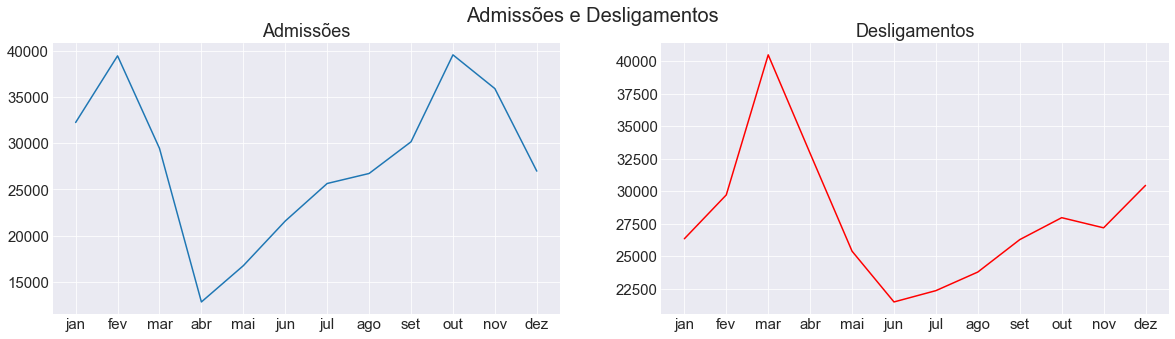

In [18]:
with plt.style.context('seaborn-darkgrid'):
    fig, axes = plt.subplots(1, 2, figsize = (20, 5))

    axes[0].plot(adm)
    axes[0].set_title("Admissões")
    #axes[0].grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)

    axes[1].plot(des, color='r')
    axes[1].axis('tight')
    axes[1].set_title("Desligamentos")
    #axes[1].grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
    
    fig.suptitle("Admissões e Desligamentos", fontsize=20)
    plt.show()

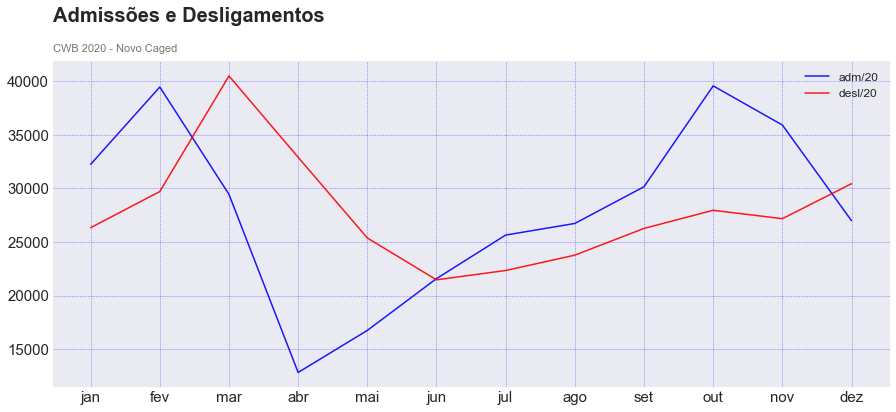

In [20]:
with plt.style.context('seaborn-darkgrid'):
    fig, ax = plt.subplots(figsize=(15,6))
    ax.plot(adm, color="b", alpha=0.9)
    ax.plot(des, color="r", alpha=0.9)
    #ax.set_title("Admissões x Desligamentos Ctba 2020", fontsize=20)
    ax.text(0, 1.12, 'Admissões e Desligamentos',
            transform=ax.transAxes, size=20, weight=600, ha='left')
    ax.text(0, 1.03, 'CWB 2020 - Novo Caged', transform=ax.transAxes, size=11, color='#777777')
    ax.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
    plt.legend(('adm/20', 'desl/20'), fontsize=12)
    #plt.rcParams['figure.figsize'] = (8,5)
    plt.savefig('adm_des')
    plt.show();
    

In [15]:
adm_des = adm.join(des)
adm_des.desligamentos.values

array([26336, 29711, 40489, 32906, 25380, 21474, 22344, 23776, 26270,
       27959, 27178, 30442], dtype=int64)

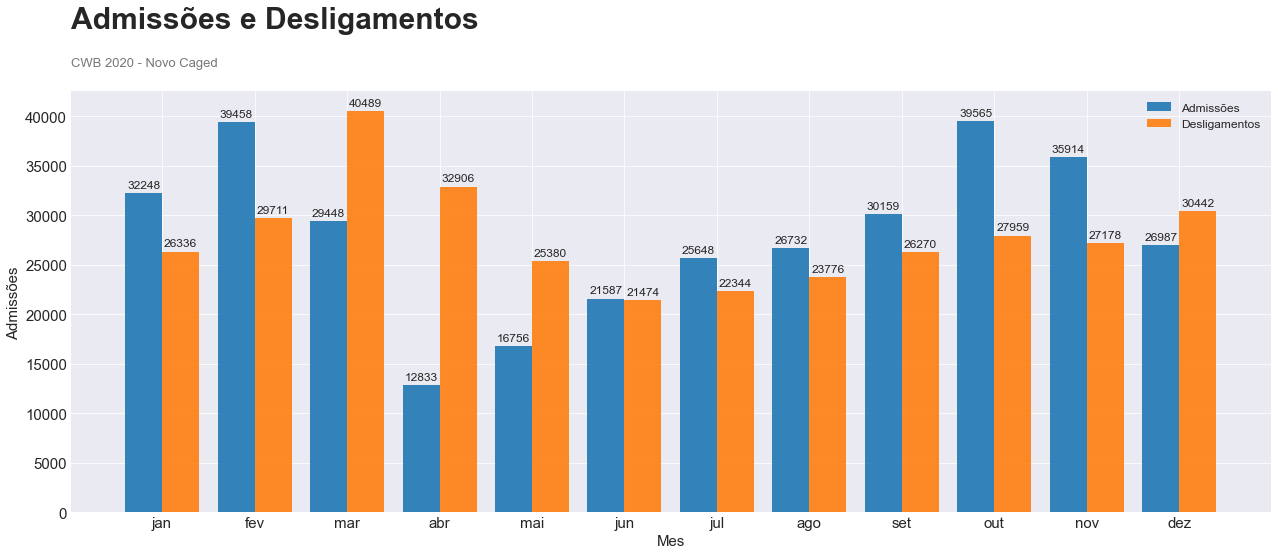

In [197]:
with plt.style.context('seaborn-darkgrid'):
    x = np.arange(len(mon))
    width = 0.4
        
    fig, ax = plt.subplots(figsize=(18, 8))
    rects1 = ax.bar(x-width/2, adm_des.admissoes.values, width, label='Admissões', alpha=0.9)
    rects2 = ax.bar(x+width/2, adm_des.desligamentos.values, width, label='Desligamentos', alpha=0.9)
    
    ax.set_ylabel('Admissões')
    #ax.set_title('Admissões e Desligamentos', fontsize=20)
    ax.text(0, 1.15, 'Admissões e Desligamentos',
            transform=ax.transAxes, size=30, weight=600, ha='left')
    ax.text(0, 1.06, 'CWB 2020 - Novo Caged', transform=ax.transAxes, size=13, color='#777777')
    ax.set_xlabel('Mes')
    ax.set_xticks(x)
    ax.set_xticklabels(mon)
    ax.legend(fontsize=12)
 
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        fontsize=12,
                        ha='center',
                        va='bottom'),
                        
    autolabel(rects1)
    autolabel(rects2)
           
    fig.tight_layout()
    plt.savefig('adm_des_2')
    plt.show()

# Criar Gráfico com Diferença entre Admissões e Desligamentos
---

In [17]:
diff= (adm.values)-(des.values) 
diff

array([[  5912],
       [  9747],
       [-11041],
       [-20073],
       [ -8624],
       [   113],
       [  3304],
       [  2956],
       [  3889],
       [ 11606],
       [  8736],
       [ -3455]], dtype=int64)

In [19]:
df_diff = pd.DataFrame(diff, index=mon, columns=['diferenca'])
df_diff

,diferenca
jan,5912
fev,9747
mar,-11041
abr,-20073
mai,-8624
jun,113
jul,3304
ago,2956
set,3889
out,11606


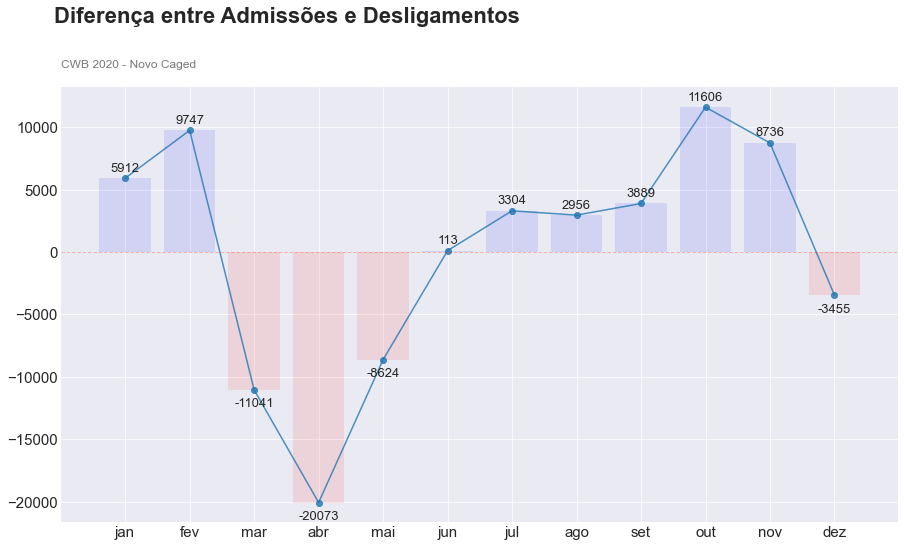

In [216]:
with plt.style.context('seaborn-darkgrid'):
    
    x = np.arange(len(mon))
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(mon, diff, marker='o', alpha=0.8)
    react = ax.bar(mon, df_diff['diferenca'], alpha= 0.1, width=0.8, color=(df_diff['diferenca']>0).map({True: 'b',
                                                            False:'r'}));
    ax.axhline(0, color='red', lw=1, ls='--', alpha=0.3)
   
    ax.set_xticks(x)
    ax.set_xticklabels(mon)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=((0, 4) if height>0 else (0,-20)),
                        textcoords="offset points",
                        fontsize=13,
                        ha='center',
                        va='bottom'),

    autolabel(react)
    plt.suptitle('Diferença entre Admissões e Desligamentos', fontsize=22, weight=600, ha='right', y=1.02, x=0.55)
    plt.title('CWB 2020 - Novo Caged', loc='left', size=12, color='#777777', pad=20)
    plt.savefig('-adm_des') 
    plt.show()

# Admissão/Desligamento por Setor
---
* Variável: secao

In [21]:
adm_setor = []
des_setor = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)].groupby(['secao']).size()
    b = data[i][data[i]['descricao'].str.contains('DES', regex=False)].groupby(['secao']).size()
    adm_setor.append(a)
    des_setor.append(b)
    

In [22]:
adm_setor = pd.DataFrame(adm_setor, index=mon)
adm_setor = adm_setor.fillna(0)
adm_setor = adm_setor.transpose()
adm_setor["soma"] = adm_setor[mon].sum(axis=1).astype(int)

In [23]:
adm_setor = adm_setor.sort_values(by=['soma'],ascending=False)
adm_setor

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,soma
Administrativas,11380.0,15621.0,9468.0,5231.0,7069.0,8999.0,11440.0,10438.0,11621.0,13276.0,13370.0,10300.0,128213
Comércio,5971.0,7123.0,6356.0,2542.0,3190.0,3817.0,4129.0,5288.0,5981.0,7980.0,8175.0,6047.0,66599
Construção,3429.0,3064.0,2656.0,1395.0,2343.0,3021.0,3076.0,2994.0,3320.0,3150.0,2988.0,1518.0,32954
Ind. Transformação,1794.0,2020.0,1826.0,681.0,808.0,915.0,1257.0,1511.0,2144.0,3064.0,2552.0,1791.0,20363
Profissionais,1636.0,1515.0,1129.0,481.0,702.0,809.0,997.0,1107.0,1368.0,4877.0,1626.0,1143.0,17390
Alimentação,2232.0,2709.0,1990.0,283.0,350.0,652.0,553.0,725.0,1226.0,1876.0,1893.0,1322.0,15811
Saúde,1223.0,1381.0,1473.0,842.0,681.0,1490.0,1797.0,1676.0,1066.0,1281.0,1331.0,1326.0,15567
Informação,1160.0,1210.0,1044.0,378.0,454.0,525.0,648.0,843.0,1087.0,1177.0,1162.0,937.0,10625
Transporte,916.0,1207.0,861.0,303.0,394.0,461.0,719.0,770.0,903.0,1195.0,1142.0,1200.0,10071
Educação,1108.0,1900.0,1129.0,135.0,146.0,180.0,219.0,396.0,405.0,459.0,411.0,300.0,6788


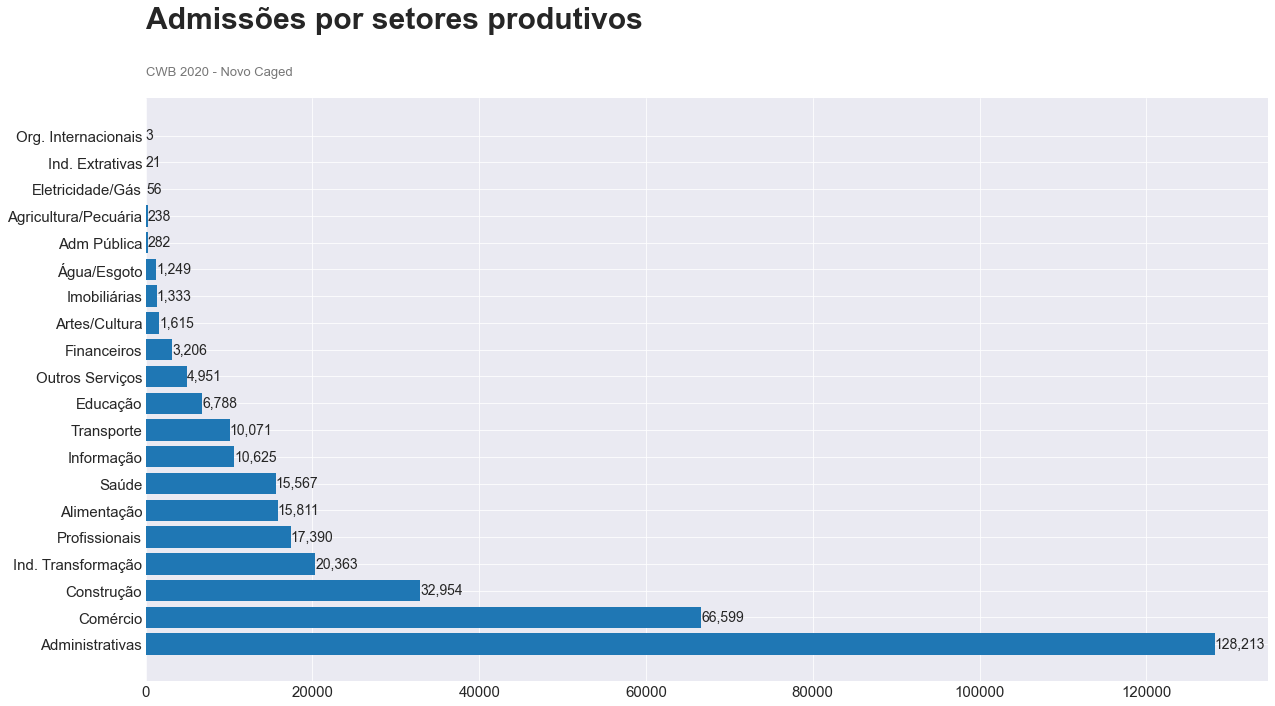

In [25]:
with plt.style.context('seaborn-darkgrid'):
    #dx = adm_setor['soma'].max() / 200
    fig, ax = plt.subplots(figsize=(18,10))
    ax.barh(adm_setor.index, adm_setor.soma, linewidth=1)
    
    for i, (value, name) in enumerate(zip(adm_setor.soma, adm_setor.index)):
        #ax.text(value-dx, i,name, size=12, weight=600, ha='right', va='bottom')
        ax.text(value, i,f'{value:,.0f}', size=14, ha='left', va='center')
   

    #ax.set_axisbelow(True)
    #ax.margins(0.01,0)
    ax.text(0, 1.12, 'Admissões por setores produtivos',
            transform=ax.transAxes, size=30, weight=600, ha='left')
    ax.text(0, 1.04, 'CWB 2020 - Novo Caged', transform=ax.transAxes, size=13, color='#777777')
    #ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            #color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    
    fig.tight_layout()
    ax.set_yticklabels(adm_setor.index, fontsize=15)
    plt.savefig('adm_setor')
    plt.show()
    

# Desligamentos por Setor
---

In [25]:
des_setor = pd.DataFrame(des_setor, index=mon)
des_setor = des_setor.fillna(0)
des_setor = des_setor.transpose()
des_setor["soma"] = des_setor[mon].sum(axis=1).astype(int)
des_setor

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,soma
Adm Pública,8.0,19.0,7.0,24.0,5.0,10.0,9.0,56.0,12.0,15.0,40.0,122.0,327
Administrativas,7461.0,9114.0,16443.0,10921.0,8286.0,6405.0,7284.0,9078.0,10872.0,10231.0,9132.0,11544.0,116771
Agricultura/Pecuária,18.0,23.0,21.0,10.0,14.0,14.0,13.0,12.0,13.0,17.0,25.0,9.0,189
Alimentação,2218.0,2413.0,3328.0,3316.0,2027.0,1477.0,1249.0,1231.0,1364.0,1426.0,1257.0,1441.0,22747
Artes/Cultura,224.0,241.0,275.0,248.0,220.0,171.0,168.0,141.0,160.0,149.0,143.0,216.0,2356
Comércio,6835.0,6911.0,8085.0,7364.0,5649.0,4729.0,4274.0,4700.0,4967.0,5517.0,5246.0,5657.0,69934
Construção,2111.0,2278.0,2947.0,2455.0,2097.0,2329.0,2384.0,2281.0,2327.0,2802.0,2160.0,2396.0,28567
Domésticos,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Educação,945.0,954.0,1050.0,799.0,889.0,612.0,1135.0,637.0,594.0,554.0,433.0,1111.0,9713
Eletricidade/Gás,22.0,11.0,29.0,2.0,3.0,11.0,16.0,11.0,18.0,9.0,219.0,111.0,462


In [26]:
des_setor = des_setor.sort_values(by=['soma'],ascending=False)
des_setor

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,soma
Administrativas,7461.0,9114.0,16443.0,10921.0,8286.0,6405.0,7284.0,9078.0,10872.0,10231.0,9132.0,11544.0,116771
Comércio,6835.0,6911.0,8085.0,7364.0,5649.0,4729.0,4274.0,4700.0,4967.0,5517.0,5246.0,5657.0,69934
Construção,2111.0,2278.0,2947.0,2455.0,2097.0,2329.0,2384.0,2281.0,2327.0,2802.0,2160.0,2396.0,28567
Alimentação,2218.0,2413.0,3328.0,3316.0,2027.0,1477.0,1249.0,1231.0,1364.0,1426.0,1257.0,1441.0,22747
Ind. Transformação,1434.0,2159.0,1887.0,2119.0,1693.0,1628.0,1717.0,1118.0,1281.0,1461.0,1471.0,1487.0,19455
Profissionais,1137.0,1260.0,1629.0,1074.0,821.0,782.0,742.0,874.0,895.0,1235.0,3057.0,1863.0,15369
Saúde,958.0,1171.0,1291.0,1055.0,1032.0,1047.0,1037.0,1196.0,1127.0,1307.0,1177.0,1763.0,14161
Transporte,1072.0,1046.0,1279.0,1559.0,1048.0,832.0,880.0,826.0,844.0,893.0,860.0,844.0,11983
Educação,945.0,954.0,1050.0,799.0,889.0,612.0,1135.0,637.0,594.0,554.0,433.0,1111.0,9713
Informação,874.0,919.0,992.0,831.0,655.0,572.0,585.0,799.0,743.0,862.0,939.0,846.0,9617


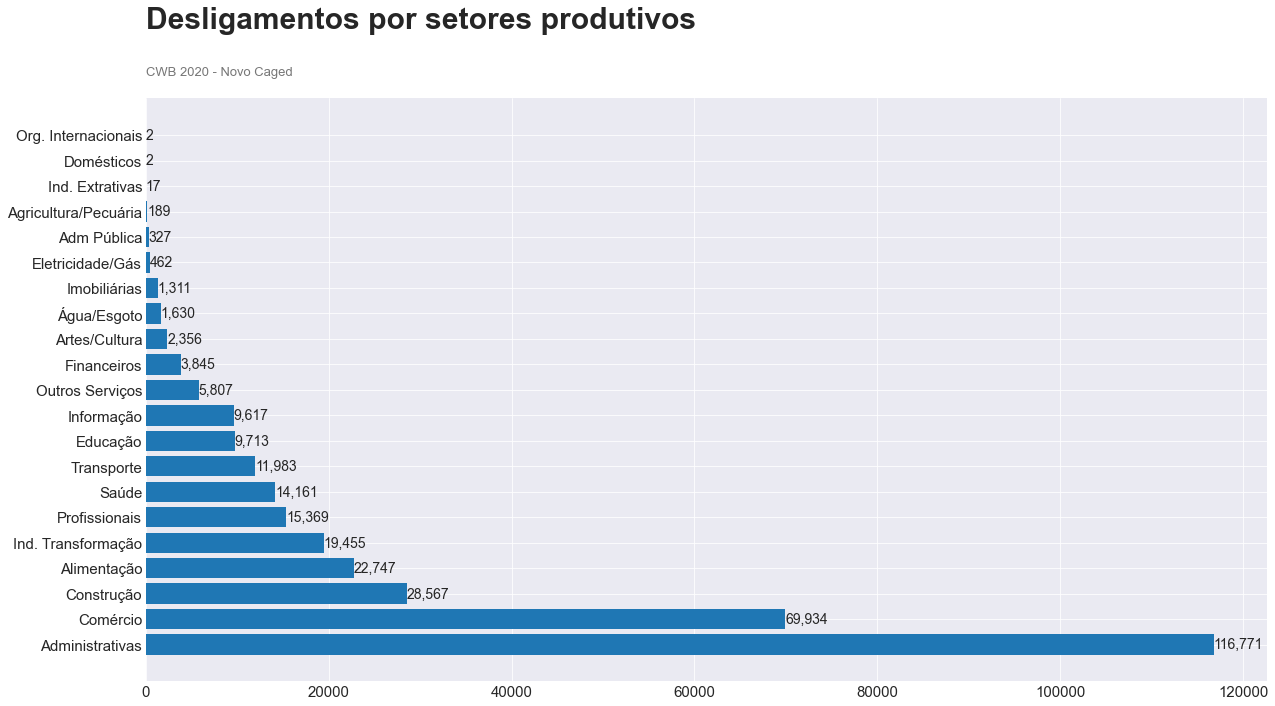

In [196]:
with plt.style.context('seaborn-darkgrid'):
    #dx = adm_setor['soma'].max() / 200
    fig, ax = plt.subplots(figsize=(18,10))
    ax.barh(des_setor.index, des_setor.soma, linewidth=1)
    
    for i, (value, name) in enumerate(zip(des_setor.soma, des_setor.index)):
        #ax.text(value-dx, i,name, size=12, weight=600, ha='right', va='bottom')
        ax.text(value, i,f'{value:,.0f}', size=14, ha='left', va='center')
   

    #ax.set_axisbelow(True)
    #ax.margins(0.01,0)
    ax.text(0, 1.12, 'Desligamentos por setores produtivos',
            transform=ax.transAxes, size=30, weight=600, ha='left')
    ax.text(0, 1.04, 'CWB 2020 - Novo Caged', transform=ax.transAxes, size=13, color='#777777')
    #ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            #color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    
    fig.tight_layout()
    ax.set_yticklabels(des_setor.index, fontsize=15)
    plt.savefig('des_setor')
    plt.show()

# Admissão/Desligamento tipo de Contrato
---
* Variável: categoria

In [26]:
data[0].head()

,municipio,secao,categoria,instrucao,idade,genero,tipo,salario,raca,descricao,mes
5,410690,Comércio,CLT,Médio Completo,38,F,20,1366.000000,Parda,ADM/Reemprego,jan
17,410690,Outros Serviços,CLT,Médio Completo,36,F,43,1370.000000,Branca,DES/Término de Contrato Determinado,jan
48,410690,Construção,CLT,Fundamental Completo,38,M,20,2466.199951,Não Informada,ADM/Reemprego,jan
50,410690,Comércio,CLT,Médio Completo,22,F,40,1307.000000,Não Informada,DES/A pedido,jan
79,410690,Construção,CLT,Fundamental Completo,63,M,31,2032.800049,Não Informada,DES/Sem Justa Causa,jan


In [27]:
adm_categoria = []
des_categoria = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)].groupby(['categoria']).size()
    b = data[i][data[i]['descricao'].str.contains('DES', regex=False)].groupby(['categoria']).size()
    adm_categoria.append(a)
    des_categoria.append(b)

In [28]:
adm_categoria = pd.DataFrame(adm_categoria, index=mon)
adm_categoria = adm_categoria.fillna(0)
adm_categoria = adm_categoria.transpose()
adm_categoria["soma"] = adm_categoria[mon].sum(axis=1).astype(int)
adm_categoria

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,soma
Aprendiz,369.0,1096.0,560.0,54.0,67.0,107.0,177.0,406.0,260.0,441.0,391.0,301.0,4229
CLT,22912.0,26536.0,23112.0,9613.0,12554.0,15409.0,16751.0,20079.0,23414.0,31559.0,28037.0,20978.0,250954
Contrato a Termo,825.0,720.0,733.0,473.0,799.0,947.0,961.0,840.0,1028.0,888.0,1324.0,919.0,10457
Intermitente,227.0,238.0,370.0,320.0,394.0,364.0,323.0,280.0,463.0,651.0,417.0,408.0,4455
Não Identificado,2518.0,2391.0,1687.0,789.0,841.0,1130.0,1575.0,1125.0,868.0,1048.0,887.0,585.0,15444
Temporário,5374.0,8417.0,2953.0,1549.0,2101.0,3630.0,5861.0,4002.0,4126.0,4978.0,4858.0,3796.0,51645
VA/Com acordo,4.0,8.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
VA/Sem acordo,19.0,52.0,25.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129


In [29]:
adm_categoria = adm_categoria.sort_values(by=['soma'],ascending=False)
adm_categoria = adm_categoria.transpose()
adm_categoria

,CLT,Temporário,Não Identificado,Contrato a Termo,Intermitente,Aprendiz,VA/Sem acordo,VA/Com acordo
jan,22912.0,5374.0,2518.0,825.0,227.0,369.0,19.0,4.0
fev,26536.0,8417.0,2391.0,720.0,238.0,1096.0,52.0,8.0
mar,23112.0,2953.0,1687.0,733.0,370.0,560.0,25.0,8.0
abr,9613.0,1549.0,789.0,473.0,320.0,54.0,33.0,2.0
mai,12554.0,2101.0,841.0,799.0,394.0,67.0,0.0,0.0
jun,15409.0,3630.0,1130.0,947.0,364.0,107.0,0.0,0.0
jul,16751.0,5861.0,1575.0,961.0,323.0,177.0,0.0,0.0
ago,20079.0,4002.0,1125.0,840.0,280.0,406.0,0.0,0.0
set,23414.0,4126.0,868.0,1028.0,463.0,260.0,0.0,0.0
out,31559.0,4978.0,1048.0,888.0,651.0,441.0,0.0,0.0


In [30]:
adm_catgoria_ = adm_categoria.drop('soma')
adm_catgoria_

,CLT,Temporário,Não Identificado,Contrato a Termo,Intermitente,Aprendiz,VA/Sem acordo,VA/Com acordo
jan,22912.0,5374.0,2518.0,825.0,227.0,369.0,19.0,4.0
fev,26536.0,8417.0,2391.0,720.0,238.0,1096.0,52.0,8.0
mar,23112.0,2953.0,1687.0,733.0,370.0,560.0,25.0,8.0
abr,9613.0,1549.0,789.0,473.0,320.0,54.0,33.0,2.0
mai,12554.0,2101.0,841.0,799.0,394.0,67.0,0.0,0.0
jun,15409.0,3630.0,1130.0,947.0,364.0,107.0,0.0,0.0
jul,16751.0,5861.0,1575.0,961.0,323.0,177.0,0.0,0.0
ago,20079.0,4002.0,1125.0,840.0,280.0,406.0,0.0,0.0
set,23414.0,4126.0,868.0,1028.0,463.0,260.0,0.0,0.0
out,31559.0,4978.0,1048.0,888.0,651.0,441.0,0.0,0.0


In [169]:
def bar(data, title, size, x_):
    with plt.style.context('seaborn-darkgrid'):
        data.plot(kind="bar", stacked=True, figsize=(18,8))
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=15)
        plt.suptitle(title, fontsize=size, weight=600, ha='right', y=1.03, x=x_)
        plt.title('CWB 2020 - Novo Caged', loc='left', size=13, color='#777777', pad=20)
        plt.xlabel("Meses/2020")
        plt.ylabel("Quantidades")
        plt.show();

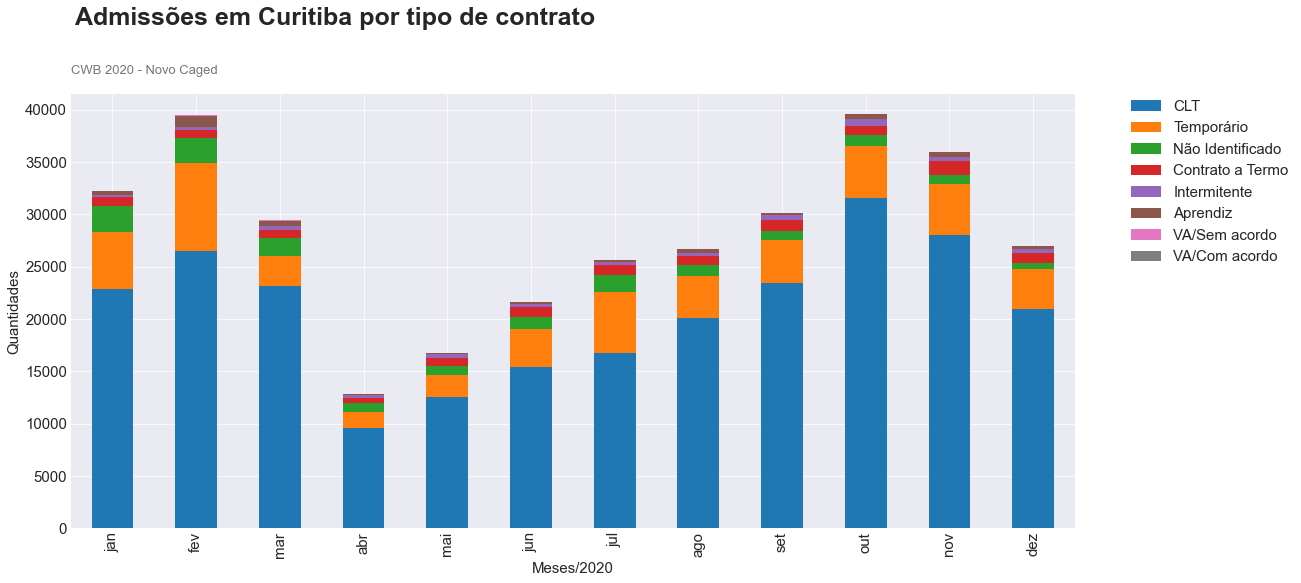

In [170]:
bar(adm_catgoria_,"Admissões em Curitiba por tipo de contrato", 25, 0.53)

# Desligamentos por tipo de contrato 
---

In [34]:
des_categoria = pd.DataFrame(des_categoria, index=mon)
des_categoria = des_categoria.fillna(0)
des_categoria = des_categoria.transpose()
des_categoria["soma"] = des_categoria[mon].sum(axis=1).astype(int)
des_categoria

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,soma
Aprendiz,564.0,736.0,588.0,301.0,468.0,438.0,514.0,787.0,578.0,570.0,539.0,567.0,6650
CLT,19108.0,21394.0,26631.0,25467.0,20108.0,16610.0,17006.0,17114.0,18654.0,21199.0,21029.0,22505.0,246825
Contrato a Termo,535.0,607.0,560.0,430.0,372.0,475.0,589.0,613.0,650.0,672.0,816.0,911.0,7230
Intermitente,183.0,187.0,155.0,309.0,573.0,315.0,256.0,362.0,287.0,336.0,314.0,296.0,3573
Não Identificado,3844.0,3736.0,3555.0,1952.0,1470.0,1648.0,1193.0,1190.0,1267.0,1302.0,1105.0,1069.0,23331
Temporário,2102.0,3051.0,8990.0,4433.0,2378.0,1980.0,2778.0,3708.0,4829.0,3877.0,3372.0,5090.0,46588
VA/Com acordo,0.0,0.0,4.0,1.0,2.0,4.0,0.0,0.0,2.0,0.0,0.0,1.0,14
VA/Sem acordo,0.0,0.0,6.0,13.0,9.0,4.0,8.0,2.0,3.0,3.0,3.0,3.0,54


In [35]:
des_categoria = des_categoria.sort_values(by=['soma'],ascending=False)
des_categoria = des_categoria.transpose()
des_categoria

,CLT,Temporário,Não Identificado,Contrato a Termo,Aprendiz,Intermitente,VA/Sem acordo,VA/Com acordo
jan,19108.0,2102.0,3844.0,535.0,564.0,183.0,0.0,0.0
fev,21394.0,3051.0,3736.0,607.0,736.0,187.0,0.0,0.0
mar,26631.0,8990.0,3555.0,560.0,588.0,155.0,6.0,4.0
abr,25467.0,4433.0,1952.0,430.0,301.0,309.0,13.0,1.0
mai,20108.0,2378.0,1470.0,372.0,468.0,573.0,9.0,2.0
jun,16610.0,1980.0,1648.0,475.0,438.0,315.0,4.0,4.0
jul,17006.0,2778.0,1193.0,589.0,514.0,256.0,8.0,0.0
ago,17114.0,3708.0,1190.0,613.0,787.0,362.0,2.0,0.0
set,18654.0,4829.0,1267.0,650.0,578.0,287.0,3.0,2.0
out,21199.0,3877.0,1302.0,672.0,570.0,336.0,3.0,0.0


In [36]:
des_catgoria_ = des_categoria.drop('soma')
des_catgoria_

,CLT,Temporário,Não Identificado,Contrato a Termo,Aprendiz,Intermitente,VA/Sem acordo,VA/Com acordo
jan,19108.0,2102.0,3844.0,535.0,564.0,183.0,0.0,0.0
fev,21394.0,3051.0,3736.0,607.0,736.0,187.0,0.0,0.0
mar,26631.0,8990.0,3555.0,560.0,588.0,155.0,6.0,4.0
abr,25467.0,4433.0,1952.0,430.0,301.0,309.0,13.0,1.0
mai,20108.0,2378.0,1470.0,372.0,468.0,573.0,9.0,2.0
jun,16610.0,1980.0,1648.0,475.0,438.0,315.0,4.0,4.0
jul,17006.0,2778.0,1193.0,589.0,514.0,256.0,8.0,0.0
ago,17114.0,3708.0,1190.0,613.0,787.0,362.0,2.0,0.0
set,18654.0,4829.0,1267.0,650.0,578.0,287.0,3.0,2.0
out,21199.0,3877.0,1302.0,672.0,570.0,336.0,3.0,0.0


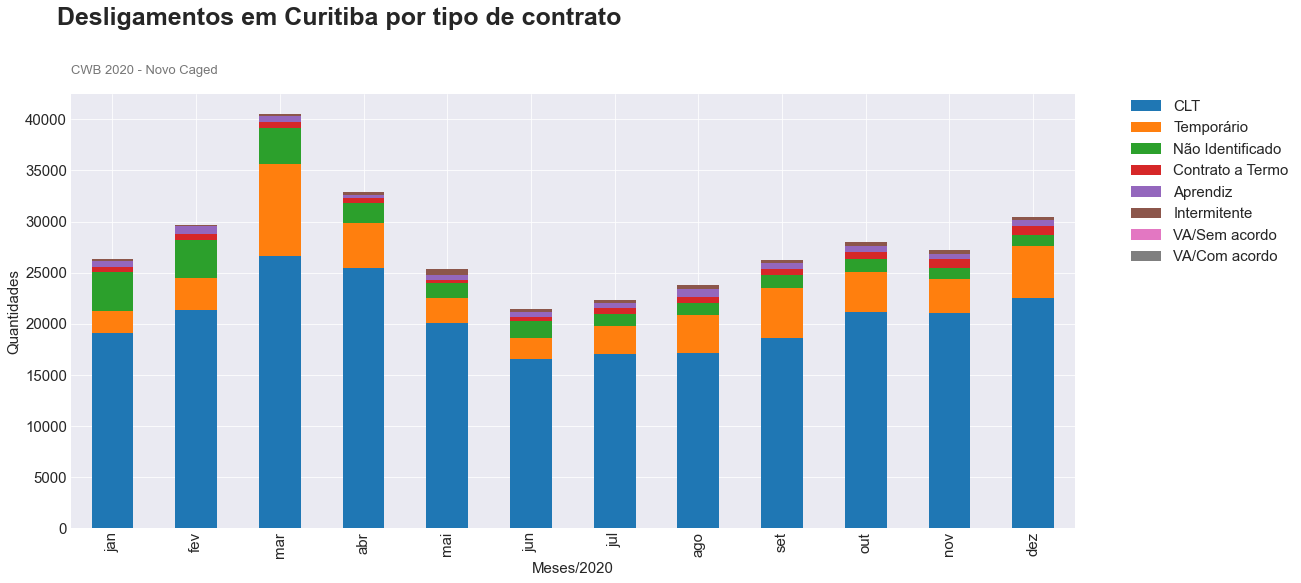

In [37]:
bar(des_catgoria_,"Desligamentos em Curitiba por tipo de contrato",25, 0.55)

# Admissão/Desligamento -> Motivos
---

In [39]:
adm_desc = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)].groupby(['descricao']).size()
    adm_desc.append(a)


In [40]:
columns=['ADM/Reemprego','ADM/Primeiro Emprego','ADM/Prazo Determinado','ADM/Reintegração']
adm_desc = pd.DataFrame(adm_desc, index=mon, columns=columns)
adm_desc

,ADM/Reemprego,ADM/Primeiro Emprego,ADM/Prazo Determinado,ADM/Reintegração
jan,30459,1664,113,12
fev,37322,2023,90,23
mar,27957,1421,48,22
abr,12202,566,40,25
mai,15902,714,111,29
jun,20811,642,102,32
jul,24271,884,469,24
ago,25618,1004,87,23
set,29030,1076,25,28
out,37953,1540,50,22


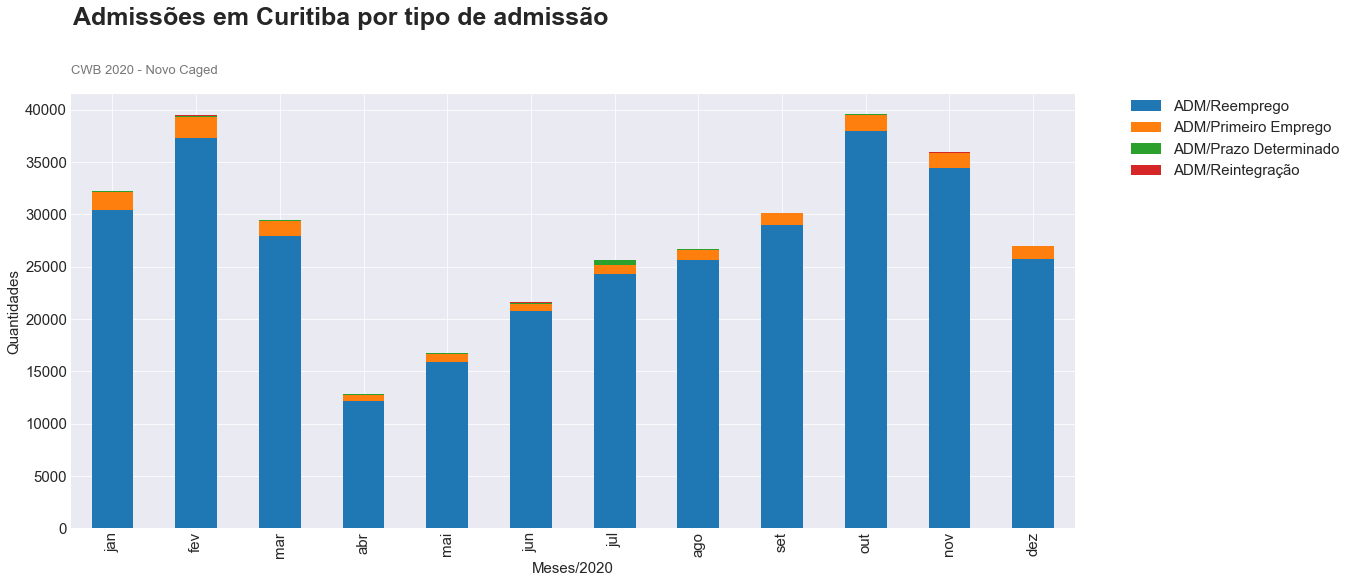

In [215]:
bar(adm_desc,"Admissões em Curitiba por tipo de admissão", 25,0.54)

In [42]:
des_desc = []
for i in range(len(data)):
    d = data[i][data[i]['descricao'].str.contains('DES', regex=False)].groupby(['descricao']).size()
    des_desc.append(d)


In [43]:
cols = ['DES/Sem Justa Causa',
        'DES/A pedido',
        'DES/Término de Contrato Determinado',
        'DES/Acordo',
        'DES/Justa Causa',
        'DES/Término de Contrato',
        'DES/Não Identificado',
        'DES/Morte',
        'DES/Culpa Recíproca',
        'DES/Aposentadoria']
des_desc = pd.DataFrame(des_desc, columns=cols, index=mon)
#des_desc = des_desc.drop(columns='DES/Tipo Ignorado')
des_desc

,DES/Sem Justa Causa,DES/A pedido,DES/Término de Contrato Determinado,DES/Acordo,DES/Justa Causa,DES/Término de Contrato,DES/Não Identificado,DES/Morte,DES/Culpa Recíproca,DES/Aposentadoria
jan,10100,9148,5223,534,487,487,263,55,28,11
fev,12178,9493,5835,654,424,789,239,62,22,15
mar,17893,8286,12226,727,413,403,428,70,30,13
abr,19518,4080,8048,469,332,232,70,72,79,5
mai,15420,3809,5109,344,294,252,59,68,18,7
jun,11474,5026,3979,359,268,129,140,79,16,3
jul,10914,6158,4274,368,288,108,76,134,20,4
ago,9757,7346,5619,480,263,72,95,117,16,10
set,9216,8825,6712,686,340,243,101,120,18,9
out,10253,10444,5832,600,322,212,189,74,12,21


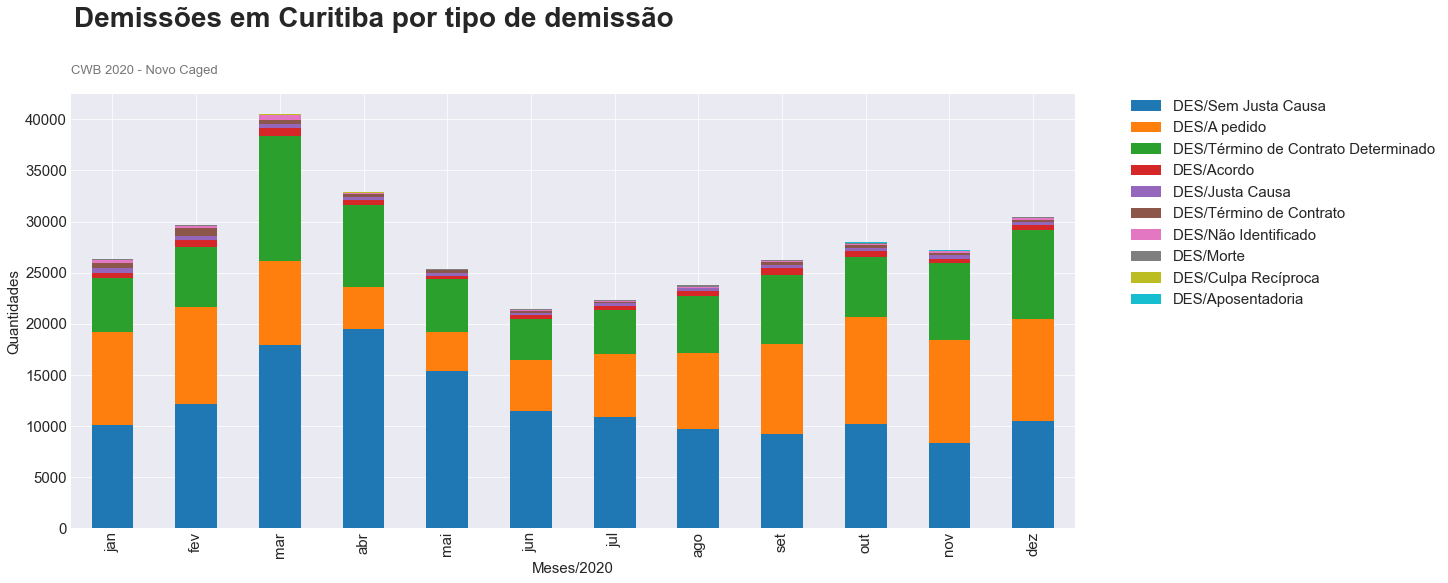

In [220]:
bar(des_desc, "Demissões em Curitiba por tipo de demissão",28, 0.59)

# Admissão Desligamento: Grau de Instrução
---
* Variável = instrucao

In [39]:
adm_instrucao = []
des_instrucao = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)].groupby(['instrucao']).size()
    b = data[i][data[i]['descricao'].str.contains('DES', regex=False)].groupby(['instrucao']).size()
    adm_instrucao.append(a)
    des_instrucao.append(b)

# Admissões por Grau de Instrução
---

In [40]:
columns = ['Analfabeto', '5º Incompleto', '5º Fundamental', '6º a 9º Fundamental', 'Fundamental Completo', 'Médio Incompleto',
          'Médio Completo', 'Superior Incompleto', 'Superior Completo', 'Pós Graduação Completa', 'Mestrado', 'Doutorado']
adm_instrucao = pd.DataFrame(adm_instrucao, index=mon, columns=columns)
adm_instrucao['Fundamental Incompleto'] = adm_instrucao.iloc[:, 1:4].sum(axis=1) 
adm_instrucao.drop(['5º Incompleto', '5º Fundamental', '6º a 9º Fundamental'],axis=1)

,Analfabeto,Fundamental Completo,Médio Incompleto,Médio Completo,Superior Incompleto,Superior Completo,Pós Graduação Completa,Mestrado,Doutorado,Fundamental Incompleto
jan,46,2871,2039,19429,1935,3563,388,64,58,1855
fev,88,4322,2778,23333,2014,3988,508,178,93,2156
mar,47,2522,1731,17821,1712,3234,436,110,43,1792
abr,38,1129,710,8235,523,1298,162,30,12,696
mai,25,1384,887,10830,830,1592,142,19,14,1033
jun,35,1901,1248,13351,1099,2448,199,19,30,1257
jul,35,2590,1370,16143,1334,2500,252,41,39,1344
ago,37,2144,1496,16853,1571,2957,326,74,56,1218
set,43,2653,1779,19121,1773,2907,322,77,58,1426
out,52,2921,3112,24237,2533,4463,404,55,69,1719


In [41]:
adm_instrucao.columns.tolist()

['Analfabeto',
 '5º Incompleto',
 '5º Fundamental',
 '6º a 9º Fundamental',
 'Fundamental Completo',
 'Médio Incompleto',
 'Médio Completo',
 'Superior Incompleto',
 'Superior Completo',
 'Pós Graduação Completa',
 'Mestrado',
 'Doutorado',
 'Fundamental Incompleto']

In [42]:
adm_instrucao = adm_instrucao[['Analfabeto',
 'Fundamental Incompleto',
 'Fundamental Completo',
 'Médio Incompleto',
 'Médio Completo',
 'Superior Incompleto',
 'Superior Completo',
 'Pós Graduação Completa',
 'Mestrado',
 'Doutorado',]]
adm_instrucao 

,Analfabeto,Fundamental Incompleto,Fundamental Completo,Médio Incompleto,Médio Completo,Superior Incompleto,Superior Completo,Pós Graduação Completa,Mestrado,Doutorado
jan,46,1855,2871,2039,19429,1935,3563,388,64,58
fev,88,2156,4322,2778,23333,2014,3988,508,178,93
mar,47,1792,2522,1731,17821,1712,3234,436,110,43
abr,38,696,1129,710,8235,523,1298,162,30,12
mai,25,1033,1384,887,10830,830,1592,142,19,14
jun,35,1257,1901,1248,13351,1099,2448,199,19,30
jul,35,1344,2590,1370,16143,1334,2500,252,41,39
ago,37,1218,2144,1496,16853,1571,2957,326,74,56
set,43,1426,2653,1779,19121,1773,2907,322,77,58
out,52,1719,2921,3112,24237,2533,4463,404,55,69


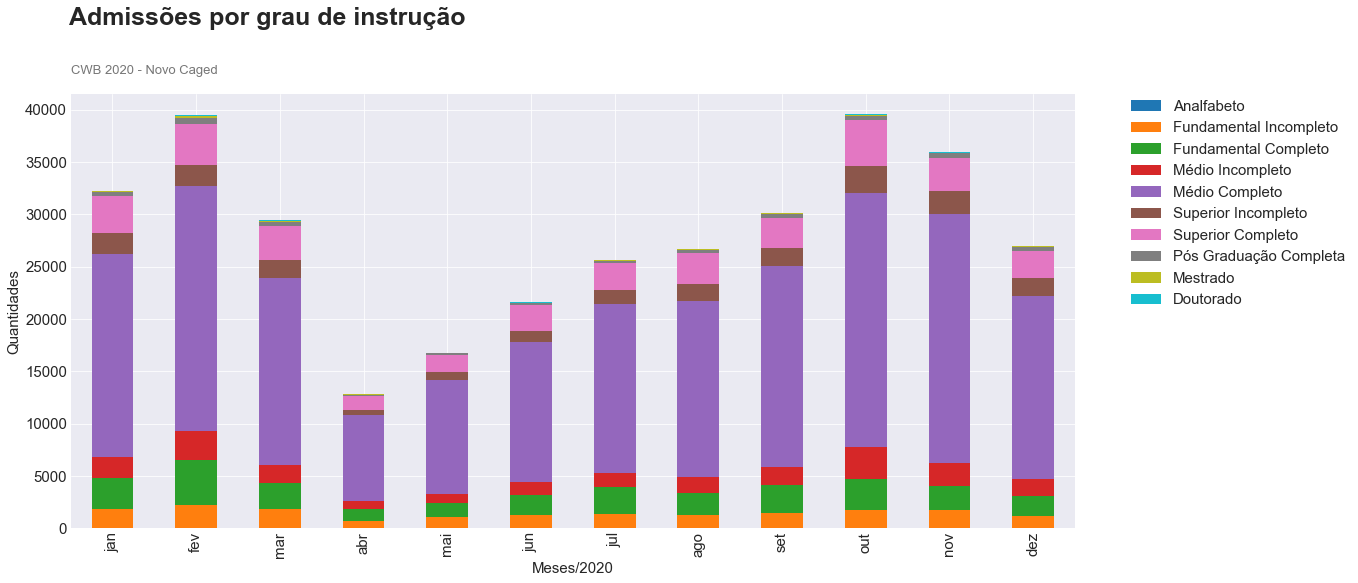

In [48]:
bar(adm_instrucao, "Admissões por grau de instrução", 25,0.43)

In [49]:
adm_instrucao = adm_instrucao.transpose()


In [50]:
adm_instrucao["soma"] = adm_instrucao[mon].sum(axis=1).astype(int)
adm_instrucao

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,soma
Analfabeto,46,88,47,38,25,35,35,37,43,52,53,41,540
Fundamental Incompleto,1855,2156,1792,696,1033,1257,1344,1218,1426,1719,1741,1164,17401
Fundamental Completo,2871,4322,2522,1129,1384,1901,2590,2144,2653,2921,2231,1865,28533
Médio Incompleto,2039,2778,1731,710,887,1248,1370,1496,1779,3112,2221,1613,20984
Médio Completo,19429,23333,17821,8235,10830,13351,16143,16853,19121,24237,23774,17547,210674
Superior Incompleto,1935,2014,1712,523,830,1099,1334,1571,1773,2533,2181,1653,19158
Superior Completo,3563,3988,3234,1298,1592,2448,2500,2957,2907,4463,3216,2666,34832
Pós Graduação Completa,388,508,436,162,142,199,252,326,322,404,404,356,3899
Mestrado,64,178,110,30,19,19,41,74,77,55,34,37,738
Doutorado,58,93,43,12,14,30,39,56,58,69,59,45,576


In [51]:
adm_instrucao = adm_instrucao.sort_values(by=['soma'],ascending=False)
adm_instrucao

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,soma
Médio Completo,19429,23333,17821,8235,10830,13351,16143,16853,19121,24237,23774,17547,210674
Superior Completo,3563,3988,3234,1298,1592,2448,2500,2957,2907,4463,3216,2666,34832
Fundamental Completo,2871,4322,2522,1129,1384,1901,2590,2144,2653,2921,2231,1865,28533
Médio Incompleto,2039,2778,1731,710,887,1248,1370,1496,1779,3112,2221,1613,20984
Superior Incompleto,1935,2014,1712,523,830,1099,1334,1571,1773,2533,2181,1653,19158
Fundamental Incompleto,1855,2156,1792,696,1033,1257,1344,1218,1426,1719,1741,1164,17401
Pós Graduação Completa,388,508,436,162,142,199,252,326,322,404,404,356,3899
Mestrado,64,178,110,30,19,19,41,74,77,55,34,37,738
Doutorado,58,93,43,12,14,30,39,56,58,69,59,45,576
Analfabeto,46,88,47,38,25,35,35,37,43,52,53,41,540


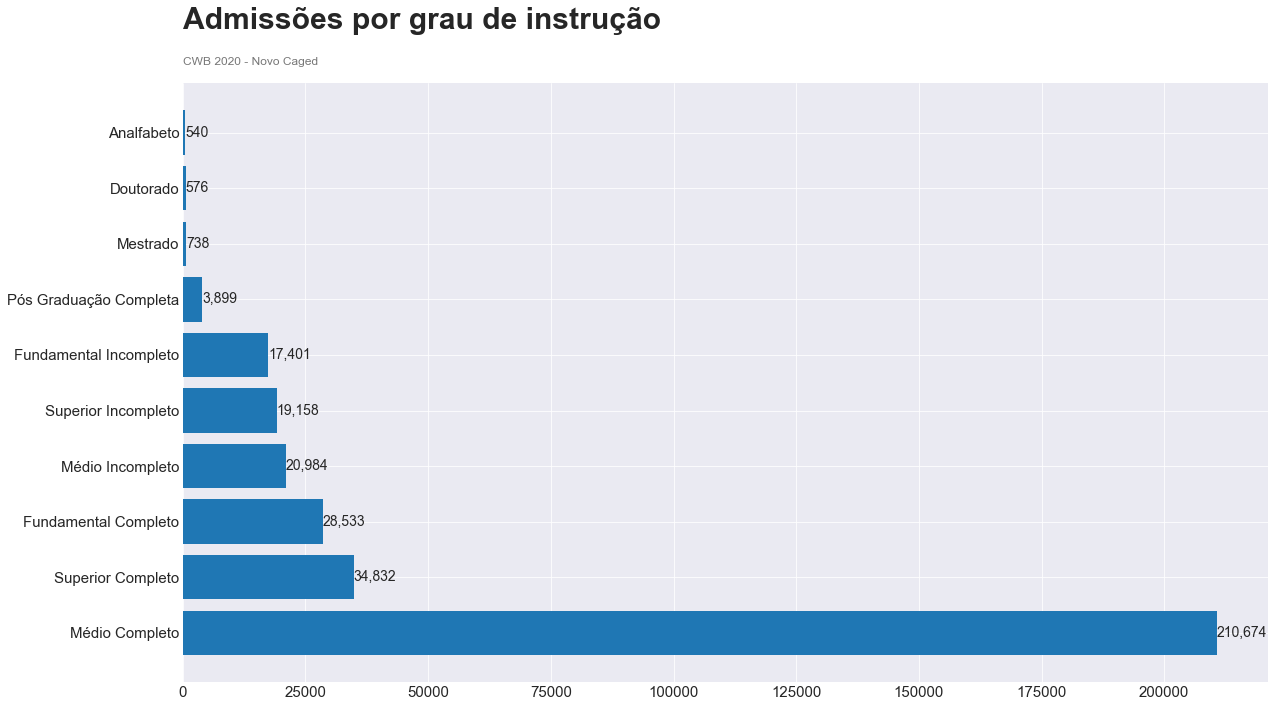

In [52]:
def barh(data, title):
    with plt.style.context('seaborn-darkgrid'):
    
        fig, ax = plt.subplots(figsize=(18,10))
        ax.barh(data.index, data.soma, linewidth=1)
    
        for i, (value, name) in enumerate(zip(data.soma, data.index)):
            ax.text(value, i,f'{value:,.0f}', size=14, ha='left', va='center')
   

        ax.text(0, 1.09, title,
                transform=ax.transAxes, size=30, weight=600, ha='left')
        ax.text(0, 1.03, 'CWB 2020 - Novo Caged', transform=ax.transAxes, size=12, color='#777777')

        fig.tight_layout()
        ax.set_yticklabels(data.index, fontsize=15)
        plt.show()
barh(adm_instrucao, 'Admissões por grau de instrução')

# Desligamentos por Grau de Instrução
---

In [53]:
des_instrucao = pd.DataFrame(des_instrucao, index=mon, columns=columns)
des_instrucao['Fundamental Incompleto'] = des_instrucao.iloc[:, 1:4].sum(axis=1) 
des_instrucao.drop(['5º Incompleto', '5º Fundamental', '6º a 9º Fundamental'],axis=1)

,Analfabeto,Fundamental Completo,Médio Incompleto,Médio Completo,Superior Incompleto,Superior Completo,Pós Graduação Completa,Mestrado,Doutorado,Fundamental Incompleto
jan,61,1866,1778,16224,1449,2900,369,83,44,1562
fev,38,2359,2099,18106,1658,3170,380,94,42,1765
mar,78,4269,2766,24595,2180,3518,378,71,57,2577
abr,54,3093,2235,20350,1581,2998,295,42,53,2205
mai,41,1994,1675,15363,1294,2685,460,54,43,1771
jun,34,1766,1487,12772,1038,2446,314,54,46,1517
jul,36,1838,1471,13082,1106,2600,417,232,122,1440
ago,65,2231,1824,13937,1223,2506,278,56,30,1626
set,35,2770,1839,15810,1389,2562,310,36,34,1485
out,42,2389,1861,17011,1545,3067,393,49,39,1563


In [54]:
des_instrucao = des_instrucao[['Analfabeto',
 'Fundamental Incompleto',
 'Fundamental Completo',
 'Médio Incompleto',
 'Médio Completo',
 'Superior Incompleto',
 'Superior Completo',
 'Pós Graduação Completa',
 'Mestrado',
 'Doutorado',]]
des_instrucao 

,Analfabeto,Fundamental Incompleto,Fundamental Completo,Médio Incompleto,Médio Completo,Superior Incompleto,Superior Completo,Pós Graduação Completa,Mestrado,Doutorado
jan,61,1562,1866,1778,16224,1449,2900,369,83,44
fev,38,1765,2359,2099,18106,1658,3170,380,94,42
mar,78,2577,4269,2766,24595,2180,3518,378,71,57
abr,54,2205,3093,2235,20350,1581,2998,295,42,53
mai,41,1771,1994,1675,15363,1294,2685,460,54,43
jun,34,1517,1766,1487,12772,1038,2446,314,54,46
jul,36,1440,1838,1471,13082,1106,2600,417,232,122
ago,65,1626,2231,1824,13937,1223,2506,278,56,30
set,35,1485,2770,1839,15810,1389,2562,310,36,34
out,42,1563,2389,1861,17011,1545,3067,393,49,39


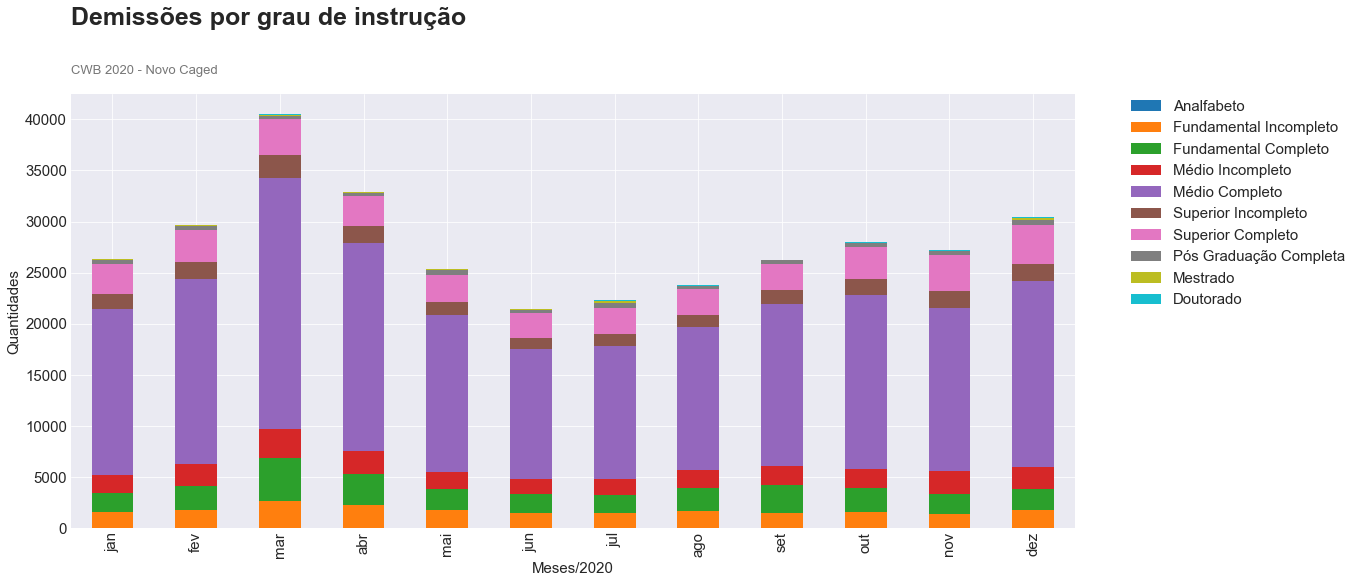

In [55]:
bar(des_instrucao, "Demissões por grau de instrução", 25, 0.43)

In [56]:
des_instrucao = des_instrucao.transpose()
des_instrucao

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
Analfabeto,61,38,78,54,41,34,36,65,35,42,52,40
Fundamental Incompleto,1562,1765,2577,2205,1771,1517,1440,1626,1485,1563,1398,1737
Fundamental Completo,1866,2359,4269,3093,1994,1766,1838,2231,2770,2389,1911,2125
Médio Incompleto,1778,2099,2766,2235,1675,1487,1471,1824,1839,1861,2258,2097
Médio Completo,16224,18106,24595,20350,15363,12772,13082,13937,15810,17011,15931,18211
Superior Incompleto,1449,1658,2180,1581,1294,1038,1106,1223,1389,1545,1683,1623
Superior Completo,2900,3170,3518,2998,2685,2446,2600,2506,2562,3067,3456,3833
Pós Graduação Completa,369,380,378,295,460,314,417,278,310,393,401,517
Mestrado,83,94,71,42,54,54,232,56,36,49,47,159
Doutorado,44,42,57,53,43,46,122,30,34,39,41,100


In [57]:
des_instrucao["soma"] = des_instrucao[mon].sum(axis=1).astype(int)
des_instrucao

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,soma
Analfabeto,61,38,78,54,41,34,36,65,35,42,52,40,576
Fundamental Incompleto,1562,1765,2577,2205,1771,1517,1440,1626,1485,1563,1398,1737,20646
Fundamental Completo,1866,2359,4269,3093,1994,1766,1838,2231,2770,2389,1911,2125,28611
Médio Incompleto,1778,2099,2766,2235,1675,1487,1471,1824,1839,1861,2258,2097,23390
Médio Completo,16224,18106,24595,20350,15363,12772,13082,13937,15810,17011,15931,18211,201392
Superior Incompleto,1449,1658,2180,1581,1294,1038,1106,1223,1389,1545,1683,1623,17769
Superior Completo,2900,3170,3518,2998,2685,2446,2600,2506,2562,3067,3456,3833,35741
Pós Graduação Completa,369,380,378,295,460,314,417,278,310,393,401,517,4512
Mestrado,83,94,71,42,54,54,232,56,36,49,47,159,977
Doutorado,44,42,57,53,43,46,122,30,34,39,41,100,651


In [58]:
des_instrucao = des_instrucao.sort_values(by=['soma'],ascending=False)
des_instrucao

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,soma
Médio Completo,16224,18106,24595,20350,15363,12772,13082,13937,15810,17011,15931,18211,201392
Superior Completo,2900,3170,3518,2998,2685,2446,2600,2506,2562,3067,3456,3833,35741
Fundamental Completo,1866,2359,4269,3093,1994,1766,1838,2231,2770,2389,1911,2125,28611
Médio Incompleto,1778,2099,2766,2235,1675,1487,1471,1824,1839,1861,2258,2097,23390
Fundamental Incompleto,1562,1765,2577,2205,1771,1517,1440,1626,1485,1563,1398,1737,20646
Superior Incompleto,1449,1658,2180,1581,1294,1038,1106,1223,1389,1545,1683,1623,17769
Pós Graduação Completa,369,380,378,295,460,314,417,278,310,393,401,517,4512
Mestrado,83,94,71,42,54,54,232,56,36,49,47,159,977
Doutorado,44,42,57,53,43,46,122,30,34,39,41,100,651
Analfabeto,61,38,78,54,41,34,36,65,35,42,52,40,576


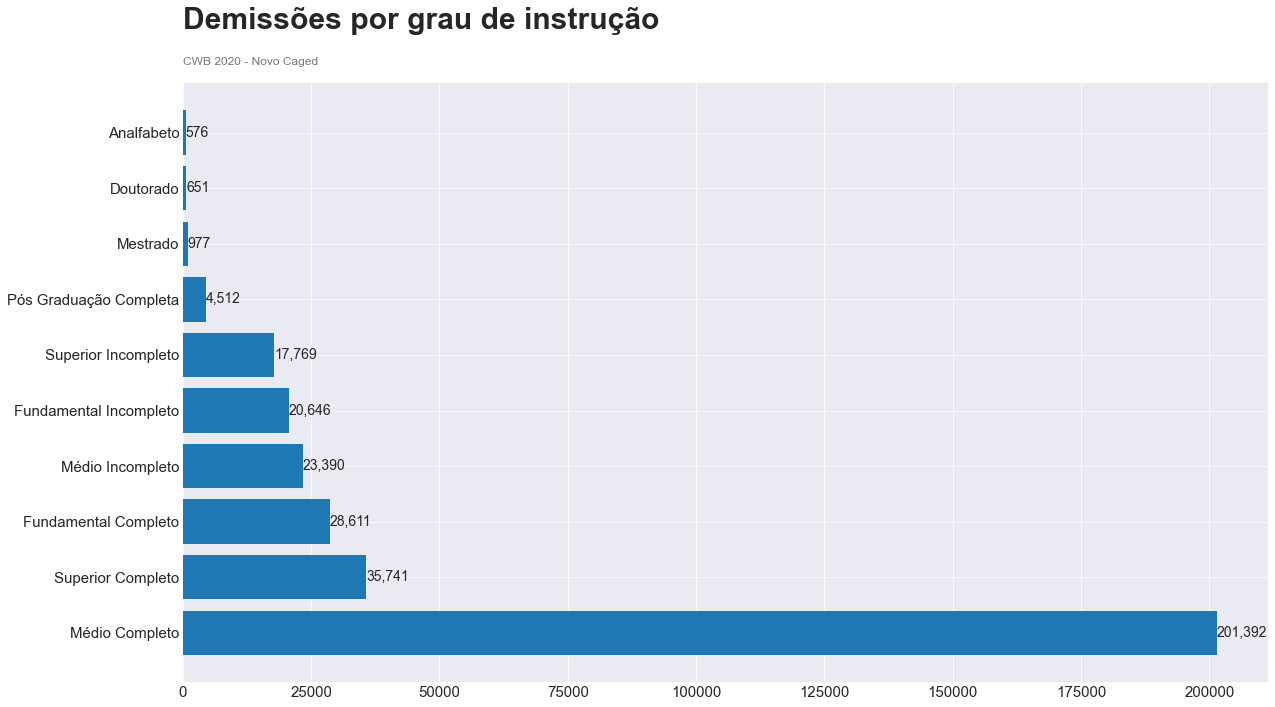

In [59]:
barh(des_instrucao, 'Demissões por grau de instrução')

# Admissões por gênero
---
* Variável: genero

In [60]:
gene_adm = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)]['genero'].value_counts()
    gene_adm.append(a)


In [61]:
gene_adm = pd.DataFrame(gene_adm, index=mon)
gene_adm

,M,F
jan,18393,13855
fev,22236,17222
mar,16346,13102
abr,7237,5596
mai,9602,7154
jun,12612,8975
jul,15394,10254
ago,15510,11222
set,17508,12651
out,21943,17622


In [62]:
gene_adm.M.values

array([18393, 22236, 16346,  7237,  9602, 12612, 15394, 15510, 17508,
       21943, 20116, 14481], dtype=int64)

In [63]:
def plot_aggregate(data1, data2, label1, label2, ylabel, title):
    with plt.style.context('seaborn-darkgrid'):
        x = np.arange(len(mon))
        width = 0.4

        fig, ax = plt.subplots(figsize=(18, 8))
        rects1 = ax.bar(x-width/2, data1, width, label=label1, alpha=0.9)
        rects2 = ax.bar(x+width/2, data2, width, label=label2, alpha=0.9)
    
        ax.set_ylabel(ylabel)
        #ax.set_title(title, fontsize=20)
        ax.set_xlabel('Mes')
        ax.set_xticks(x)
        ax.set_xticklabels(mon, fontsize=15)
        ax.legend()
 
        def autolabel(rects):
            for rect in rects:
                height = rect.get_height()
                ax.annotate('{}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),
                            textcoords="offset points",
                            fontsize=15,
                            ha='center',
                            va='bottom'),
                        
        autolabel(rects1)
        autolabel(rects2)
        plt.suptitle(title, fontsize=25, weight=600, ha='right', y=1.05, x=0.27 )
        plt.title('CWB 2020 - Novo Caged', loc='left', size=13, color='#777777', pad=20)
        fig.tight_layout()

        plt.show()

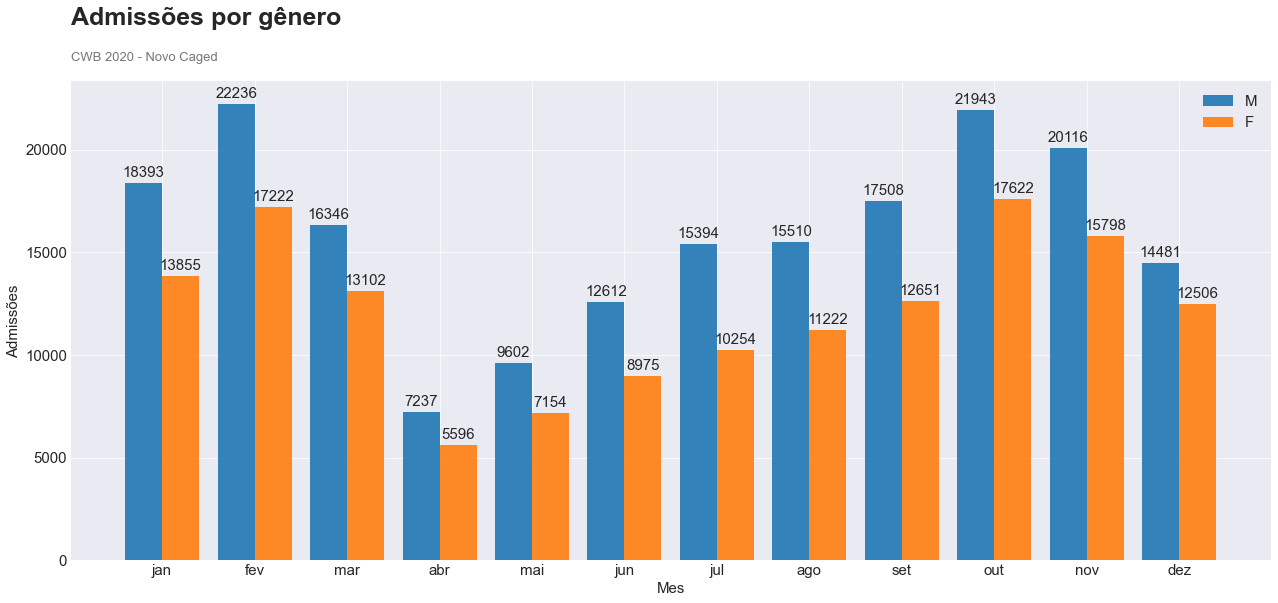

In [64]:
plot_aggregate(gene_adm.M, gene_adm.F,"M","F",'Admissões','Admissões por gênero')

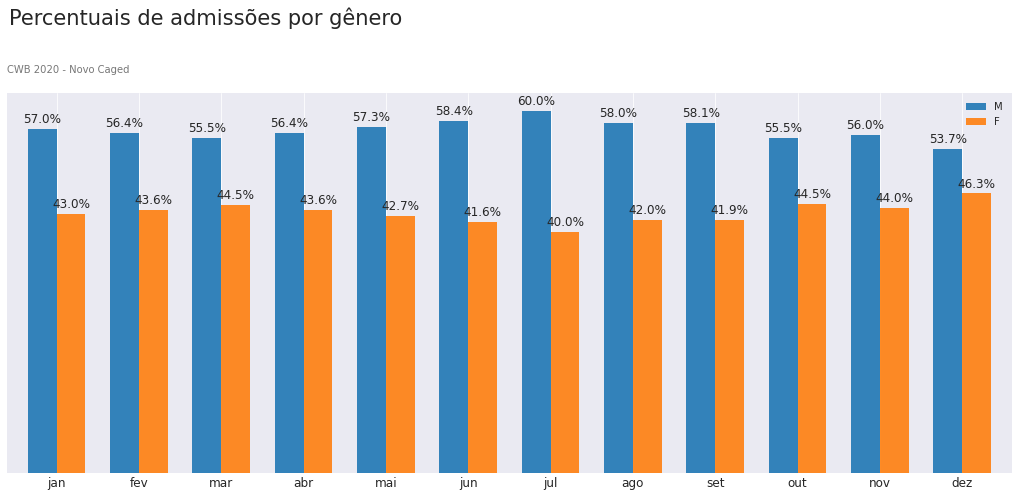

In [320]:
with plt.style.context('seaborn-darkgrid'):
    result_pct = gene_adm.div(gene_adm.sum(1), axis=0)

    ax = result_pct.plot(kind='bar',figsize=(18,7),width = 0.7,edgecolor=None, alpha=0.9)
    plt.legend(labels=gene_adm.columns,fontsize= 10)

    plt.xticks(fontsize=12, rotation=0)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.yticks([])
    
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()  
        ax.annotate('{:.1%}'.format(height), 
                    (p.get_x()+.5*width, p.get_y() + height + 0.01), 
                    ha = 'center',
                   size=12)
    plt.suptitle('Percentuais de admissões por gênero', fontsize=21, weight=500, ha='right', y=1.05, x=0.43)
    plt.title('CWB 2020 - Novo Caged', loc='left', size=10, color='#777777', pad=20)
        

# Demissões por gênero
---

In [65]:
gene_dem = []
for i in range(len(data)):
    d = data[i][data[i]['descricao'].str.contains('DES', regex=False)]['genero'].value_counts()
    gene_dem.append(d)


In [66]:
gene_dem = pd.DataFrame(gene_dem, index=mon)
gene_dem

,M,F
jan,14061,12275
fev,16245,13466
mar,23277,17212
abr,18259,14647
mai,13584,11796
jun,12225,9249
jul,12860,9484
ago,13474,10302
set,15396,10874
out,16025,11934


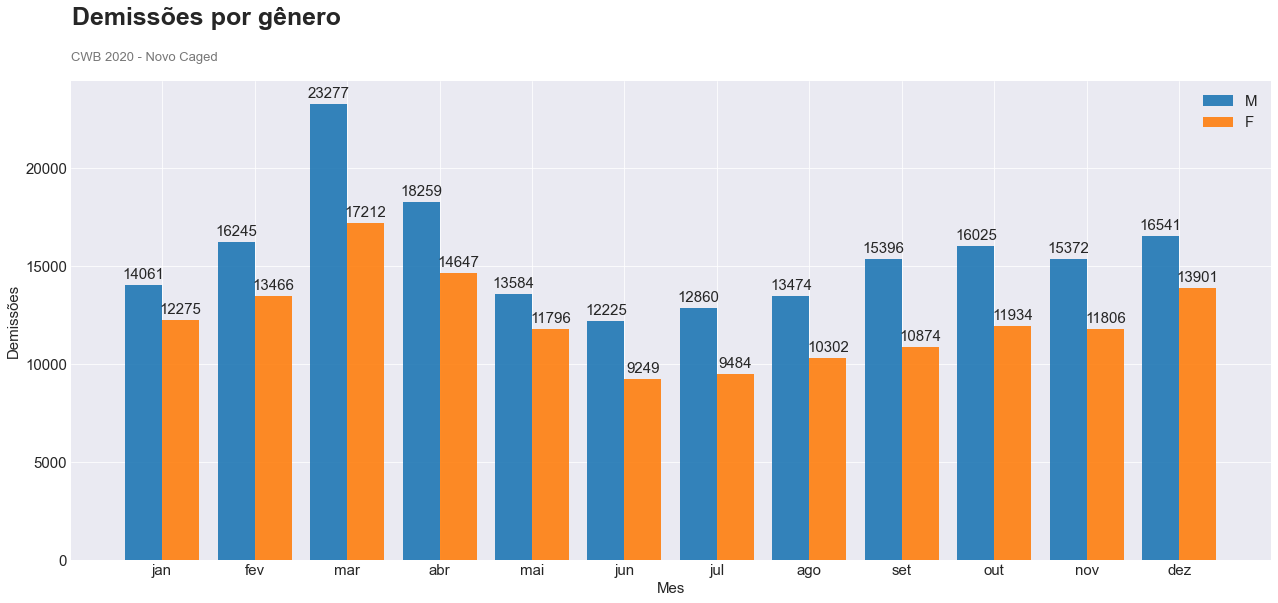

In [67]:
plot_aggregate(gene_dem.M, gene_dem.F,"M","F",'Demissões','Demissões por gênero')

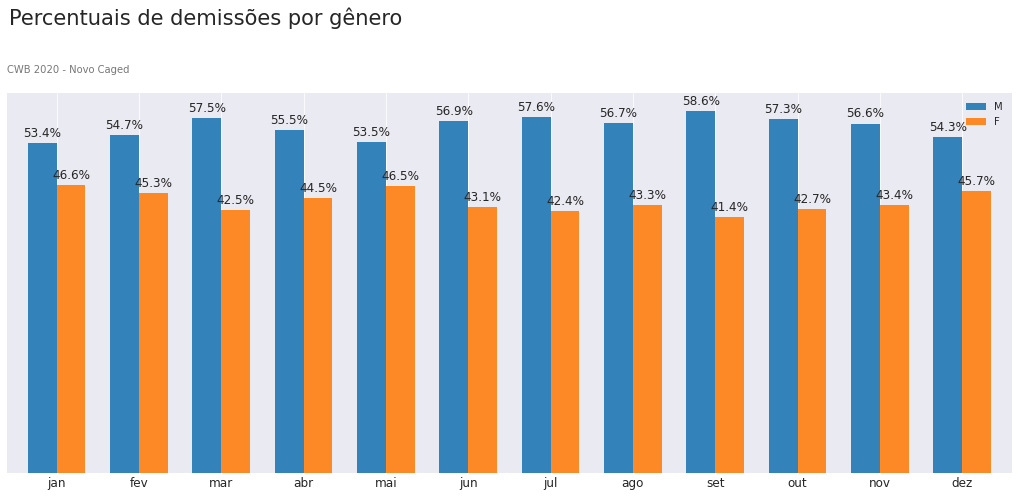

In [321]:
with plt.style.context('seaborn-darkgrid'):
    result_pct = gene_dem.div(gene_dem.sum(1), axis=0)

    ax = result_pct.plot(kind='bar',figsize=(18,7),width = 0.7,edgecolor=None, alpha=0.9)
    plt.legend(labels=gene_dem.columns,fontsize= 10)

    plt.xticks(fontsize=12, rotation=0)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.yticks([])

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()  
        ax.annotate('{:.1%}'.format(height), 
                    (p.get_x()+.5*width, p.get_y() + height + 0.01), 
                    ha = 'center',
                   size=12)
    plt.suptitle('Percentuais de demissões por gênero', fontsize=21, weight=500, ha='right', y=1.05, x=0.43)
    plt.title('CWB 2020 - Novo Caged', loc='left', size=10, color='#777777', pad=20)

# Difrença por Gênero
---

In [71]:
diff_gen_M = gene_adm.M.values - gene_dem.M.values
diff_gen_M

array([  4332,   5991,  -6931, -11022,  -3982,    387,   2534,   2036,
         2112,   5918,   4744,  -2060], dtype=int64)

In [72]:
diff_gen_F = gene_adm.F.values - gene_dem.F.values
diff_gen_F

array([ 1580,  3756, -4110, -9051, -4642,  -274,   770,   920,  1777,
        5688,  3992, -1395], dtype=int64)

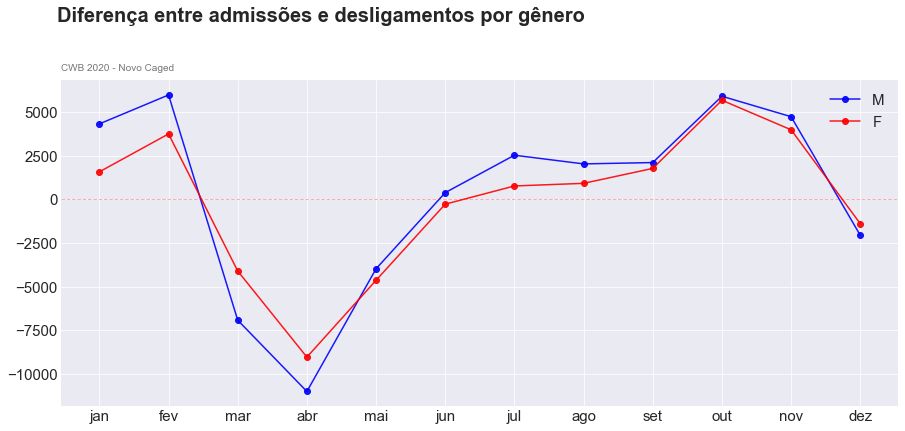

In [331]:
with plt.style.context('seaborn-darkgrid'):
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.plot(mon, diff_gen_M, marker='o', alpha=0.9, color='blue', label='M')
    ax.plot(mon, diff_gen_F, marker='o', alpha=0.9, color='red', label='F')
    ax.axhline(0, color='red', lw=1, ls='--', alpha=0.3)
    ax.legend()
    
    plt.suptitle('Diferença entre admissões e desligamentos por gênero', fontsize=20, weight=600, ha='right', y=1.05, x=0.61)
    plt.title('CWB 2020 - Novo Caged', loc='left', size=10, color='#777777', pad=10)
    #plt.title('Diferença entre Admissões e Desligamentos por Gênero', fontsize=20)
     
    plt.show()

# Admissão/Desligamento por Idade
---
* Variável: idade

In [74]:
adm_idade_bp = []
dem_idade_bp = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)]['idade'].astype(int).values
    d = data[i][data[i]['descricao'].str.contains('DES', regex=False)]['idade'].fillna(30).astype(int).values
    adm_idade_bp.append(a)
    dem_idade_bp.append(d)

In [75]:
a = list(chain.from_iterable([adm_idade_bp[i]for i in range(0,12)]))
d = list(chain.from_iterable([dem_idade_bp[i]for i in range(0,12)]))

stats.median(d)

30

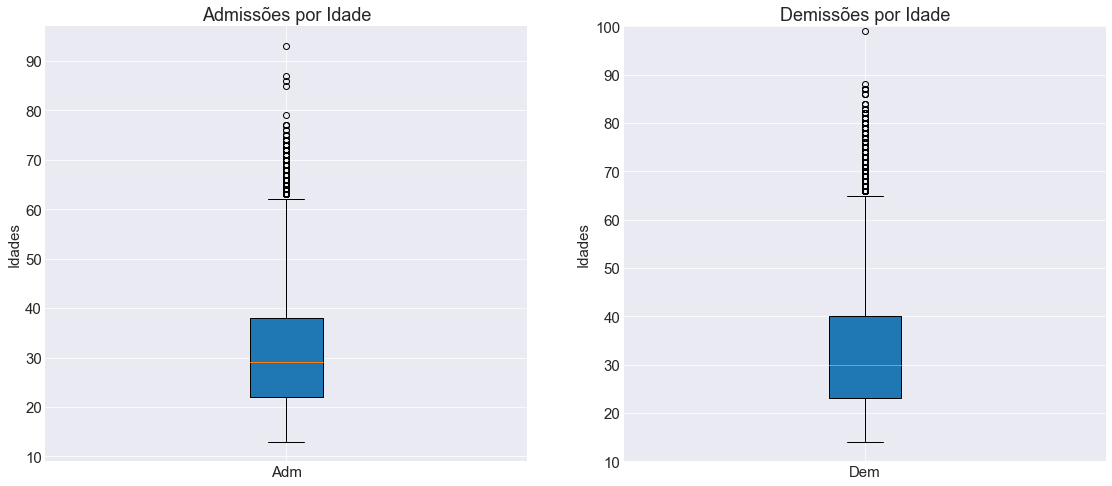

In [76]:
with plt.style.context('seaborn-darkgrid'):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(19, 8))
    bplot1 = ax1.boxplot(a, patch_artist=True, labels=['Adm'])
    ax1.set_title('Admissões por Idade')
    ax1.set_ylabel('Idades')
    bplot2 = ax2.boxplot(d, patch_artist=True, labels=['Dem'])
    ax2.set_title('Demissões por Idade')
    ax2.set_ylabel('Idades')
    plt.ylim(10, 100)
    plt.show()

In [77]:
adm_idade = []
dem_idade = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)]['idade'].value_counts()
    d = data[i][data[i]['descricao'].str.contains('DES', regex=False)]['idade'].value_counts()
    adm_idade.append(a)
    dem_idade.append(d)

In [78]:
adm_idade = pd.DataFrame(adm_idade, index=mon)
adm_idade = adm_idade.fillna(0)
adm_idade = adm_idade.transpose()
adm_idade["soma_adm"] = adm_idade[mon].sum(axis=1).astype(int)
adm_idade

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,soma_adm
13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
14.0,10.0,44.0,18.0,2.0,0.0,3.0,5.0,11.0,13.0,51.0,17.0,11.0,185
15.0,38.0,208.0,58.0,12.0,6.0,21.0,21.0,64.0,59.0,85.0,80.0,69.0,721
16.0,132.0,282.0,126.0,24.0,32.0,35.0,59.0,104.0,127.0,207.0,198.0,149.0,1475
17.0,303.0,572.0,394.0,151.0,235.0,334.0,480.0,673.0,834.0,1261.0,1282.0,981.0,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
85.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
86.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [79]:
dem_idade = pd.DataFrame(dem_idade, index=mon)
dem_idade = dem_idade.fillna(0)
dem_idade = dem_idade.transpose()
dem_idade["soma_dem"] = dem_idade[mon].sum(axis=1).astype(int)
dem_idade

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,soma_dem
14.0,4.0,2.0,6.0,0.0,1.0,1.0,1.0,4.0,3.0,5.0,3.0,11.0,41
15.0,15.0,30.0,28.0,18.0,17.0,19.0,14.0,57.0,50.0,19.0,39.0,48.0,354
16.0,52.0,124.0,131.0,42.0,74.0,66.0,102.0,154.0,114.0,115.0,84.0,156.0,1214
17.0,165.0,264.0,309.0,205.0,189.0,207.0,241.0,409.0,459.0,476.0,585.0,645.0,4154
18.0,651.0,804.0,1392.0,869.0,636.0,534.0,596.0,789.0,896.0,986.0,1007.0,1172.0,10332
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3
86.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3
87.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,5
88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [80]:
def idade(df):    
    ages = [10,20,30,40,50,60,70,80,90,100]
    labels = ["10-20","20-30","30-40","40-50","50-60","60-70", "70-80", "80-90", "90-100"]
    df['range_age'] = pd.cut(df.index, ages, labels = labels)

In [81]:
idade(adm_idade)
idade(dem_idade)

In [82]:
adm_idade.head()

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,soma_adm,range_age
13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10-20
14.0,10.0,44.0,18.0,2.0,0.0,3.0,5.0,11.0,13.0,51.0,17.0,11.0,185,10-20
15.0,38.0,208.0,58.0,12.0,6.0,21.0,21.0,64.0,59.0,85.0,80.0,69.0,721,10-20
16.0,132.0,282.0,126.0,24.0,32.0,35.0,59.0,104.0,127.0,207.0,198.0,149.0,1475,10-20
17.0,303.0,572.0,394.0,151.0,235.0,334.0,480.0,673.0,834.0,1261.0,1282.0,981.0,7500,10-20


In [83]:
df_adm = adm_idade[['soma_adm', 'range_age']]
df_dem = dem_idade[['soma_dem', 'range_age']]
df_adm

,soma_adm,range_age
13.0,1,10-20
14.0,185,10-20
15.0,721,10-20
16.0,1475,10-20
17.0,7500,10-20
...,...,...
79.0,1,70-80
85.0,1,80-90
86.0,1,80-90
87.0,1,80-90


In [84]:
df_adm = df_adm[['soma_adm','range_age']].groupby('range_age').sum()
df_dem = df_dem[['soma_dem','range_age']].groupby('range_age').sum()
df_adm

,soma_adm
range_age,
10-20,56357
20-30,131071
30-40,84577
40-50,46538
50-60,16766
60-70,1960
70-80,62
80-90,3
90-100,1


In [85]:
df_adm_dem = pd.merge(df_adm, df_dem, how = 'outer', on='range_age')
df_adm_dem

,soma_adm,soma_dem
range_age,,
10-20,56357,43867
20-30,131071,125629
30-40,84577,86165
40-50,46538,49201
50-60,16766,23362
60-70,1960,5537
70-80,62,470
80-90,3,30
90-100,1,1


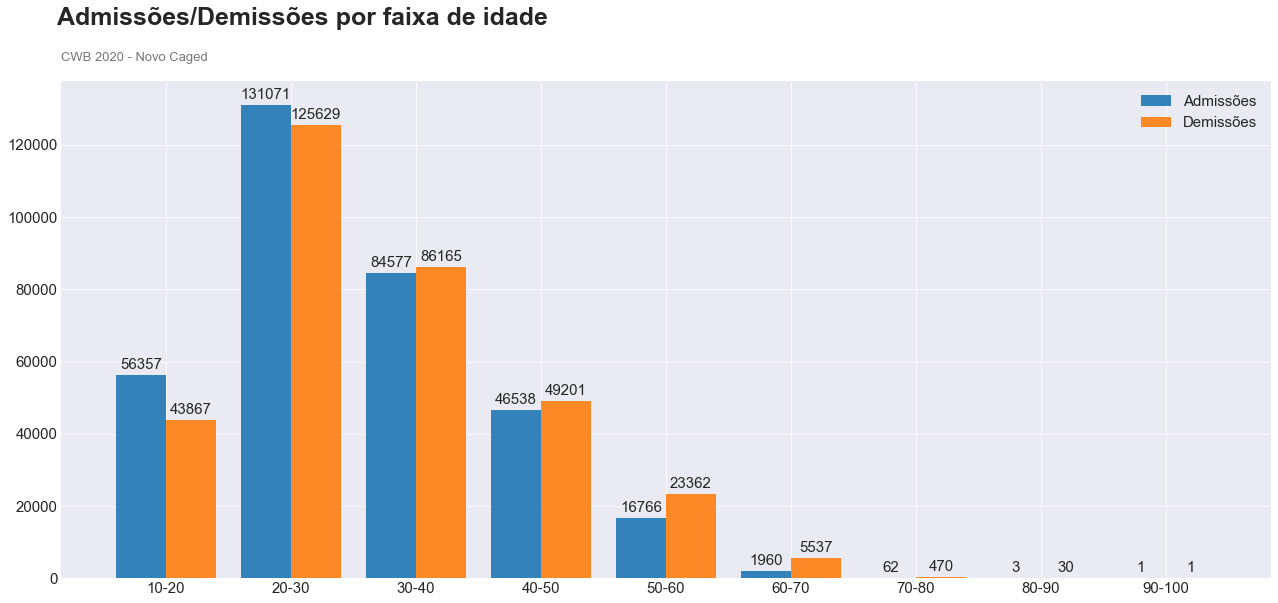

In [334]:
with plt.style.context('seaborn-darkgrid'):
    x = np.arange(len(df_adm_dem.index))
    width = 0.4

    fig, ax = plt.subplots(figsize=(18, 8))
    rects1 = ax.bar(x-width/2, df_adm_dem.soma_adm, width, label='Admissões', alpha=0.9)
    rects2 = ax.bar(x+width/2, df_adm_dem.soma_dem, width, label='Demissões', alpha=0.9)

    ax.set_xticks(x)
    ax.set_xticklabels(df_adm_dem.index, fontsize=15)
    ax.legend()
 
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        fontsize=15,
                        ha='center', va='bottom'),
                        
    autolabel(rects1)
    autolabel(rects2)
           
    plt.suptitle('Admissões/Demissões por faixa de idade', fontsize=25, weight=600, ha='right', y=1.05, x=0.43)
    plt.title('CWB 2020 - Novo Caged', loc='left', size=13, color='#777777', pad=20)
    
    fig.tight_layout()

    plt.show()

# Admissão/Desligamento por Faixa de Salário
---
* Variavel: salario

In [152]:
adm_salario_bp = []
dem_salario_bp = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)]['salario'].fillna(1388.79).round(2).values
    d = data[i][data[i]['descricao'].str.contains('DES', regex=False)]['salario'].fillna(1045.0).round(2).values
    adm_salario_bp.append(a)
    dem_salario_bp.append(d)

In [153]:
a = list(chain.from_iterable([adm_salario_bp[i]for i in range(0,12)]))
d = list(chain.from_iterable([dem_salario_bp[i]for i in range(0,12)]))


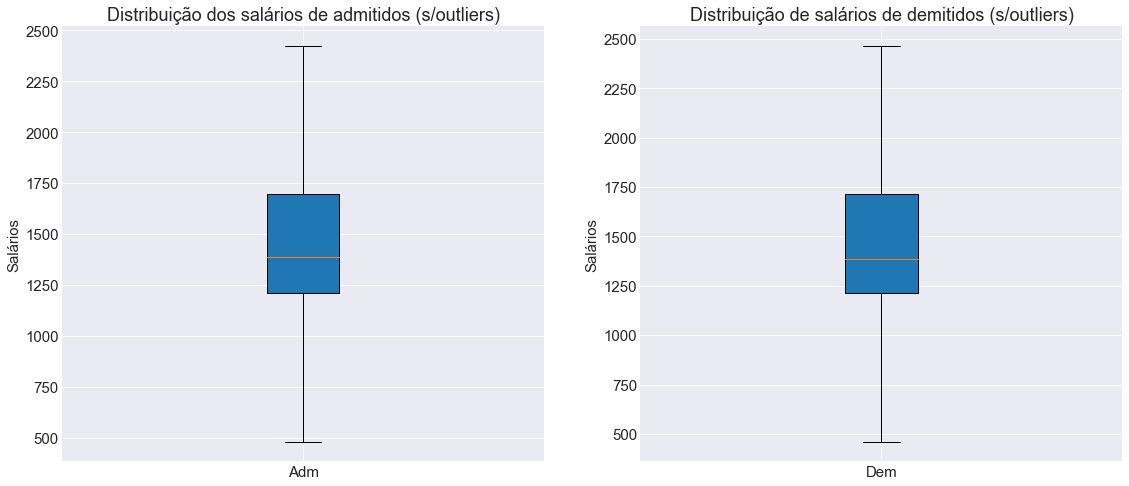

In [121]:
with plt.style.context('seaborn-darkgrid'):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(19, 8))
    bplot1 = ax1.boxplot(a, patch_artist=True, labels=['Adm'], showfliers=False)
    ax1.set_title('Distribuição dos salários de admitidos (s/outliers)')
    ax1.set_ylabel('Salários')
    bplot2 = ax2.boxplot(d, patch_artist=True, labels=['Dem'], showfliers=False)
    ax2.set_title('Distribuição de salários de demitidos (s/outliers)')
    ax2.set_ylabel('Salários')
    plt.show()

In [154]:
dfa = pd.DataFrame(a, columns=['adm_salario'])
dfb = pd.DataFrame(d, columns=['des_salario'])


In [155]:
dfa = dfa.replace(0,1)
dfb = dfb.replace(0,1)

In [156]:
import sys

dfa['range_salary']=pd.cut(

   dfa['adm_salario'],

   bins=[0, 1045, 5225, 10450, sys.maxsize],

   labels=['até 1 salário', 'de 2 a 5 salários', 'de 5 a 10 salários', 'mais que 10 salários']

)


In [157]:
dfb['range_salary']=pd.cut(

   dfb['des_salario'],

   bins=[0, 1045, 5225, 10450, sys.maxsize],

   labels=['até 1 salário', 'de 2 a 5 salários', 'de 5 a 10 salários', 'mais que 10 salários']

)

In [158]:
dfa.loc[dfa['adm_salario']<1000]

,adm_salario,range_salary
25,964.05,até 1 salário
28,294.00,até 1 salário
33,606.00,até 1 salário
35,865.50,até 1 salário
53,690.00,até 1 salário
...,...,...
337299,950.00,até 1 salário
337313,670.00,até 1 salário
337325,986.23,até 1 salário
337327,950.00,até 1 salário


In [159]:
dfa = dfa.groupby('range_salary').count()
dfb = dfb.groupby('range_salary').count()
dfa

,adm_salario
range_salary,
até 1 salário,47552
de 2 a 5 salários,281469
de 5 a 10 salários,6170
mais que 10 salários,2144


In [160]:
dfb

,des_salario
range_salary,
até 1 salário,45027
de 2 a 5 salários,279711
de 5 a 10 salários,7108
mais que 10 salários,2419


In [161]:
df_adm_dem_salario = pd.merge(dfa, dfb, how = 'outer', on='range_salary')
df_adm_dem_salario

,adm_salario,des_salario
range_salary,,
até 1 salário,47552,45027
de 2 a 5 salários,281469,279711
de 5 a 10 salários,6170,7108
mais que 10 salários,2144,2419


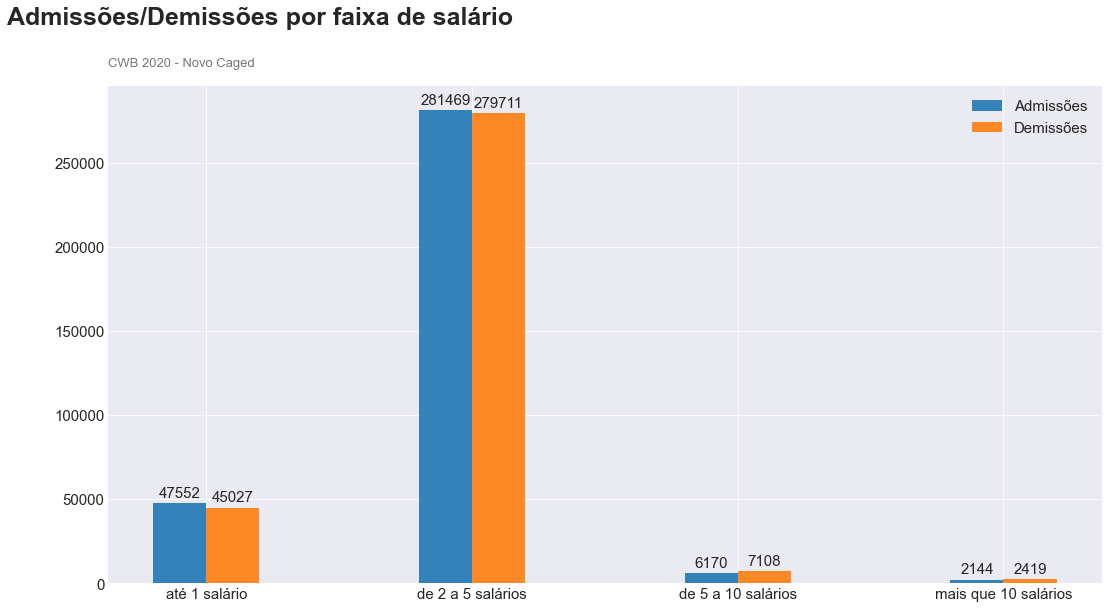

In [168]:
with plt.style.context('seaborn-darkgrid'):
    x = np.arange(len(df_adm_dem_salario.index))
    width = 0.2

    fig, ax = plt.subplots(figsize=(15, 8))
    rects1 = ax.bar(x-width/2, df_adm_dem_salario.adm_salario, width, label='Admissões', alpha=0.9)
    rects2 = ax.bar(x+width/2, df_adm_dem_salario.des_salario, width, label='Demissões', alpha=0.9)

    ax.set_xticks(x)
    ax.set_xticklabels(df_adm_dem_salario.index, fontsize=15)
    ax.legend()
 
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        fontsize=15,
                        ha='center', va='bottom'),
                        
    autolabel(rects1)
    autolabel(rects2)
           
    plt.suptitle('Admissões/Demissões por faixa de salário', fontsize=25, weight=600, ha='right', y=1.06, x=0.44)
    plt.title('CWB 2020 - Novo Caged', loc='left', size=13, color='#777777', pad=20)
    
    fig.tight_layout()

    plt.show()

# Admissão/Desligamento Raça
---
* Variável: raca

In [173]:
adm_raca = []
dem_raca = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)]['raca'].value_counts()
    b = data[i][data[i]['descricao'].str.contains('DES', regex=False)]['raca'].value_counts()
    adm_raca.append(a)
    dem_raca.append(b)

# Admissões por Raca
---

In [174]:
adm_raca = pd.DataFrame(adm_raca, index=mon)
adm_raca

,Branca,Não Informada,Parda,Preta,Amarela,Indígena
jan,17052,8696,5296,1015,120,69
fev,21453,10203,6320,1205,128,149
mar,15907,8018,4481,900,106,36
abr,6970,3504,1950,338,52,19
mai,8795,4550,2763,561,67,20
jun,11538,5506,3674,713,111,45
jul,13315,6864,4435,829,107,98
ago,13552,7677,4523,832,89,59
set,15973,8358,4700,980,104,44
out,19844,10707,7436,1331,198,49


# Demissões po Raça
---

In [175]:
dem_raca = pd.DataFrame(dem_raca, index=mon)
dem_raca

,Branca,Não Informada,Parda,Preta,Não Identificado,Amarela,Indígena
jan,14656,6861,3572,819,263,94,71
fev,16735,7178,4460,878,239,154,67
mar,22663,9488,6375,1226,428,161,148
abr,18341,8169,5006,1053,70,212,55
mai,14786,6077,3464,747,59,206,41
jun,12099,5202,3225,671,140,107,30
jul,12708,5407,3360,660,76,101,32
ago,13368,5828,3621,684,95,136,44
set,14504,6320,4268,837,101,123,117
out,15194,7077,4379,929,189,138,53


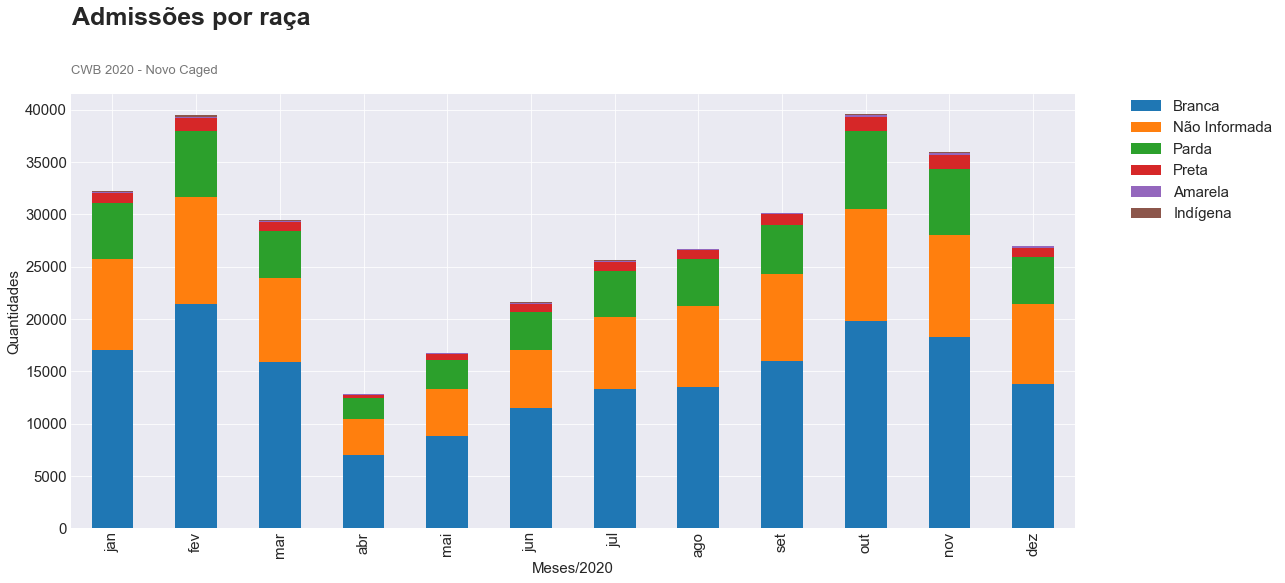

In [179]:
bar(adm_raca, "Admissões por raça",25, 0.31)

# Demissões por Raça
---

In [180]:
dem_raca['Não Informada'] = dem_raca['Não Informada'] + dem_raca['Não Identificado']
dem_raca = dem_raca.drop(columns='Não Identificado')
dem_raca

,Branca,Não Informada,Parda,Preta,Amarela,Indígena
jan,14656,7124,3572,819,94,71
fev,16735,7417,4460,878,154,67
mar,22663,9916,6375,1226,161,148
abr,18341,8239,5006,1053,212,55
mai,14786,6136,3464,747,206,41
jun,12099,5342,3225,671,107,30
jul,12708,5483,3360,660,101,32
ago,13368,5923,3621,684,136,44
set,14504,6421,4268,837,123,117
out,15194,7266,4379,929,138,53


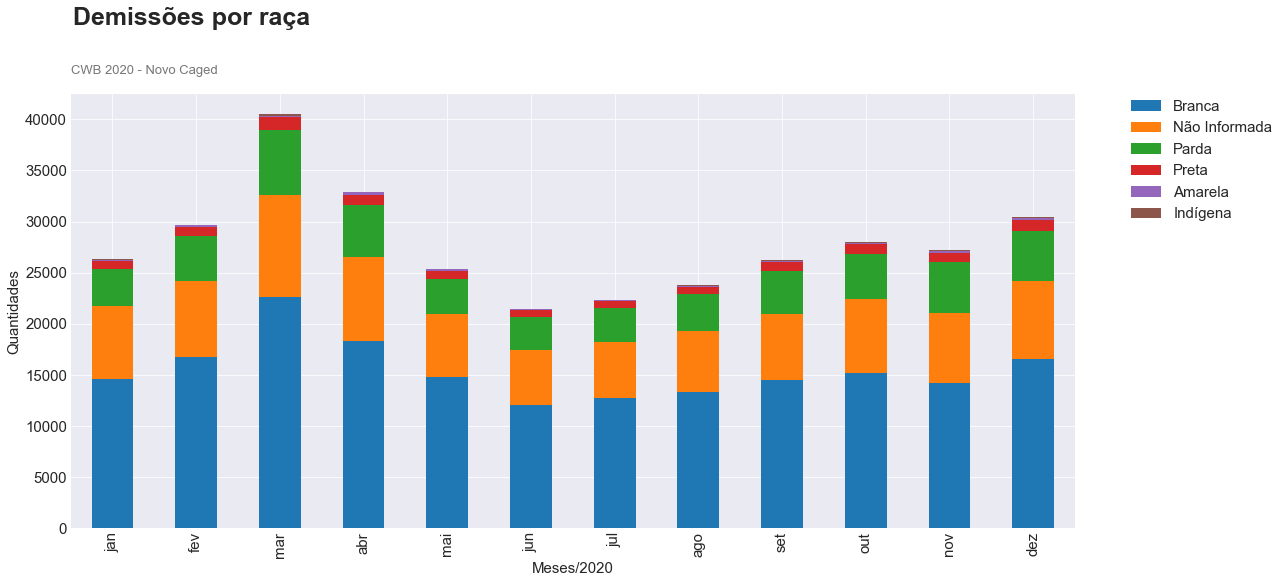

In [181]:
bar(dem_raca, "Demissões por raça", 25, 0.31)